(use_plotcollection)=
# Using `PlotCollection` objects

This tutorial covers handling {class}`~arviz_plots.PlotCollection`; its main attributes and methods, and how to use it to modify the figure it contains. It does **not** cover how to create a `PlotCollection`. Consequently, this should not be the first time you are hearing about `PlotCollection`. If you are not, we recommend first going over either one of the following two pages:

* {ref}`plots_intro` which introduces the "batteries-included" plots. That is, functions that take data and generate a specific type of plot, using opinionated defaults. All these functions return a `PlotCollection` object.
* {ref}`compose_own_plot` which focuses on `PlotCollection` creation and different strategies that might be followed to generate/fill the {term}`figure` and all its {term}`plots`.

## `PlotCollection` attributes

### `viz`: organized storage of plotting backend objects
The {attr}`.viz <.PlotCollection.viz>` attribute contains _most of_ the elements that comprise the visualization itself: the {term}`figure`, {term}`plots` and {term}`visuals`.

"most of" because while the {term}`figure` and {term}`plot` elements are created _directly_ by methods of `PlotCollection` like {meth}`~.PlotCollection.grid` or 
{meth}`~.PlotCollection.wrap`, {term}`visuals` are created by external functions executed through `PlotCollection` as many times as needed on the indicated {term}`plots`,
and some of these functions might not return an object from the plotting backend library to store.

In [1]:
from arviz_base import load_arviz_data
idata = load_arviz_data("rugby")

In [2]:
from arviz_plots import plot_dist, plot_forest, plot_trace_dist, style
style.use("arviz-variat")

ArviZ plotting functions aim to store as many {term}`visuals` as possible. This makes all visual elements available to further customization after the function has been called.
Let's see what are the contents of the `PlotCollection` returned by {func}`~arviz_plots.plot_dist`:

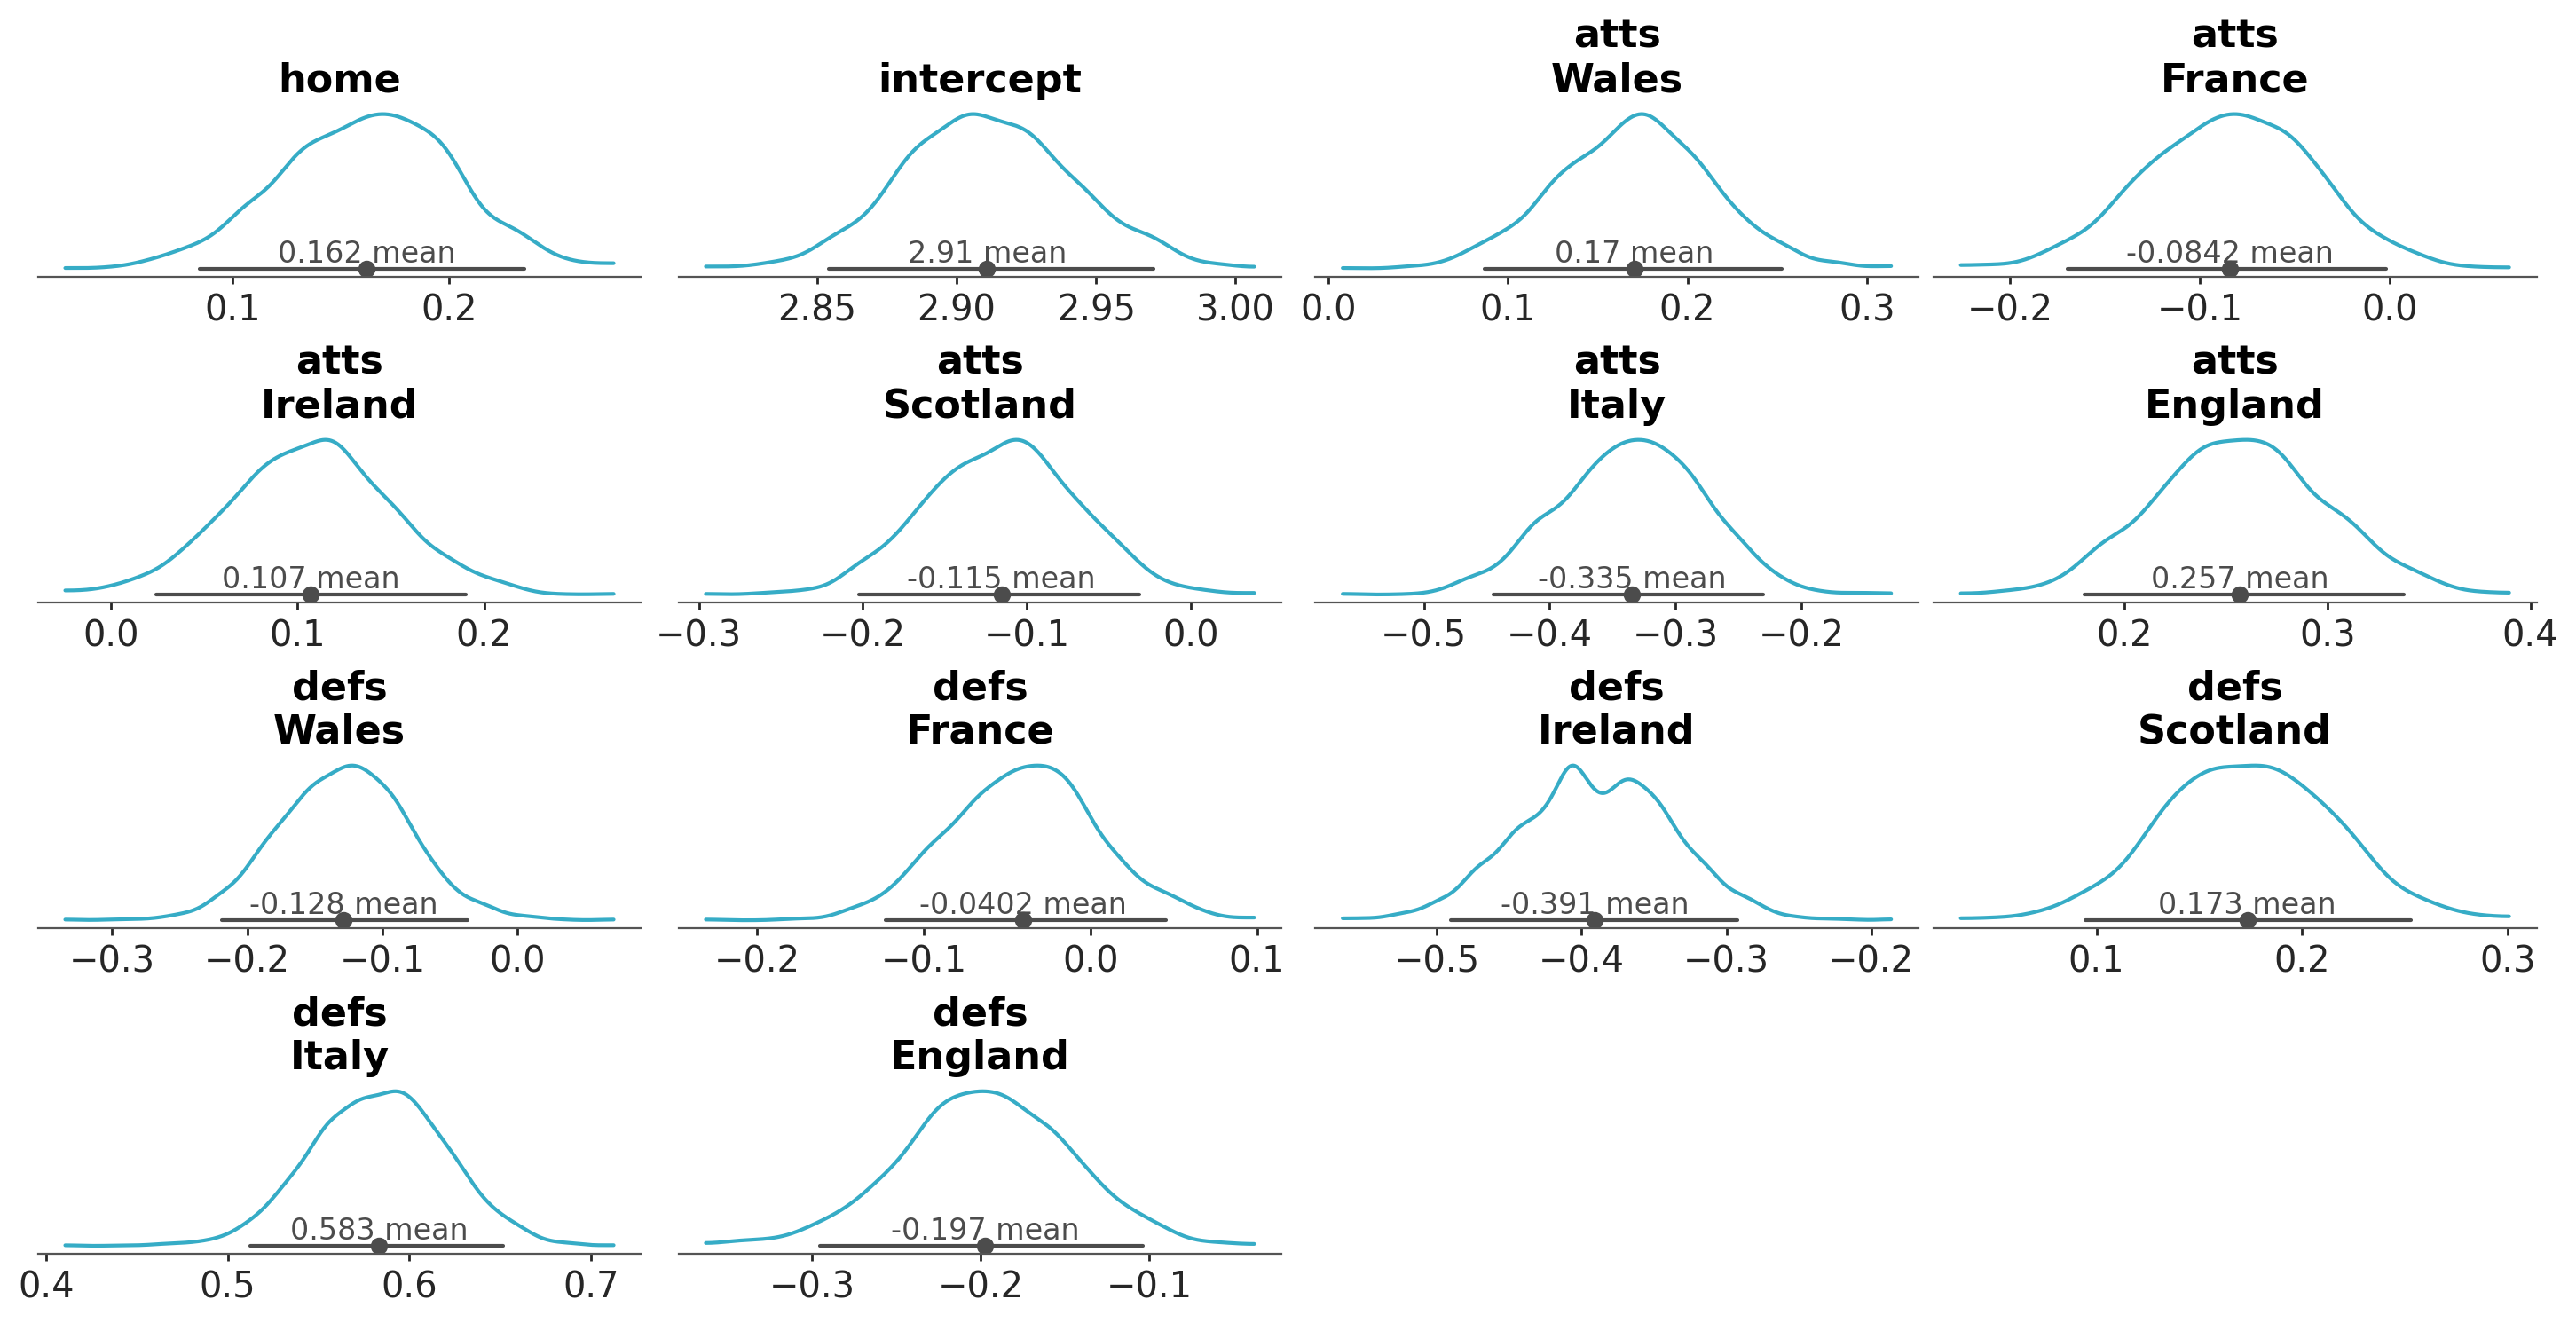

In [3]:
pc = plot_dist(idata, var_names=["home", "intercept", "atts", "defs"])

In [4]:
pc.viz

<xarray.DataTree>
Group: /
│   Dimensions:  ()
│   Data variables:
│       figure   object 8B Figure(2880x1468.27)
├── Group: /plot
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       object 8B Axes(0.0107484,0.795216;0.236051x0.130683)
│           intercept  object 8B Axes(0.261407,0.795216;0.236051x0.130683)
│           atts       (team) object 48B Axes(0.510618,0.795216;0.236051x0.130683) .....
│           defs       (team) object 48B Axes(0.0107484,0.295216;0.236051x0.130683) ....
├── Group: /row_index
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       int64 8B 0
│           intercept  int64 8B 0
│           atts       (team) int64 48B 0 0 1 1 1 1
│           defs       (team) int64 48B 2 2 2 2 3 3
├── Group: /col_index
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       int64 8B 0
│           intercept  int64 8B 1
│           atts       (team) int64 48B 2 3 0 1 2 3
│           defs       (team) int64 48B 0 1 2 3 0 1
├── Group: /kde
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       object 8B Line2D(_child0)
│           intercept  object 8B Line2D(_child0)
│           atts       (team) object 48B Line2D(_child0) ... Line2D(_child0)
│           defs       (team) object 48B Line2D(_child0) ... Line2D(_child0)
├── Group: /credible_interval
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       object 8B Line2D(_child1)
│           intercept  object 8B Line2D(_child1)
│           atts       (team) object 48B Line2D(_child1) ... Line2D(_child1)
│           defs       (team) object 48B Line2D(_child1) ... Line2D(_child1)
├── Group: /point_estimate
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       object 8B <matplotlib.collections.PathCollection object at 0x7...
│           intercept  object 8B <matplotlib.collections.PathCollection object at 0x7...
│           atts       (team) object 48B <matplotlib.collections.PathCollection objec...
│           defs       (team) object 48B <matplotlib.collections.PathCollection objec...
├── Group: /point_estimate_text
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       object 8B Text(0.162016509814486, 0.9577840727794782, '0.162 m...
│           intercept  object 8B Text(2.9108943547607997, 1.267474020711413, '2.91 me...
│           atts       (team) object 48B Text(0.1704484929621235, 0.9551953057416148,...
│           defs       (team) object 48B Text(-0.1284704097033847, 0.817180174976101,...
└── Group: /title
        Dimensions:    (team: 6)
        Coordinates:
          * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
        Data variables:
            home       object 8B Text(0.5, 1.0, 'home')
            intercept  object 8B Text(0.5, 1.0, 'intercept')
            atts       (team) object 48B Text(0.5, 1.0, 'atts\nWales') ... Text(0.5, ...
            defs       (team) object 48B Text(0.5, 1.0, 'defs\nWales') ... Text(0.5, ...

As you can see by inspecting the HTML interactive view right above, the `.viz` attribute is a {class}`.DataTree` with 8 groups. There will always be one group per {term}`visual`. In contrast, {term}`Plots` can be either groups or data, depending on the faceting strategy. In this case, we are faceting over the variables, so `plot` is a group. Thus, the eight groups are:

* `plot`: the backend objects that correspond to the {term}`plot` elements.
* `row_index` and `col_index`: integer indicators of the row and column each {term}`plot` occupies within the {term}`figure`
* `kde`, `credible_interval`, `point_estimate`, `point_estimate_text` and `title`: the {term}`visuals` corresponding respectively to: the KDE line (blue line), credible interval line (gray horizontal line), the point estimate dot (gray circle), the point estimate annotation (gray text over the point estimate) and the title (in bolded black font over each plot).

Each group will have variables matching the variables in the input data (or a subset of them). The dimensions of each group are independent. So are the dimensions of each variable. These may be different for each visual group, and may even be different among the variables within each group.

Moreover, there is a global `figure` variable which is always a scalar.


:::{important}
The **structure** of the `.viz` attribute is backend agnostic, but its **contents** are backend dependent.
:::

In [5]:
pc = plot_dist(idata, backend="bokeh")
pc.viz

<xarray.DataTree>
Group: /
│   Dimensions:  ()
│   Data variables:
│       figure   object 8B GridPlot(id='p1960', ...)
├── Group: /plot
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       object 8B figure(id='p1001', ...)
│           intercept  object 8B figure(id='p1035', ...)
│           atts_star  (team) object 48B figure(id='p1069', ...) ... figure(id='p1239...
│           defs_star  (team) object 48B figure(id='p1273', ...) ... figure(id='p1443...
│           sd_att     object 8B figure(id='p1477', ...)
│           sd_def     object 8B figure(id='p1511', ...)
│           atts       (team) object 48B figure(id='p1545', ...) ... figure(id='p1715...
│           defs       (team) object 48B figure(id='p1749', ...) ... figure(id='p1919...
├── Group: /row_index
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       int64 8B 0
│           intercept  int64 8B 0
│           atts_star  (team) int64 48B 0 0 1 1 1 1
│           defs_star  (team) int64 48B 2 2 2 2 3 3
│           sd_att     int64 8B 3
│           sd_def     int64 8B 3
│           atts       (team) int64 48B 4 4 4 4 5 5
│           defs       (team) int64 48B 5 5 6 6 6 6
├── Group: /col_index
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       int64 8B 0
│           intercept  int64 8B 1
│           atts_star  (team) int64 48B 2 3 0 1 2 3
│           defs_star  (team) int64 48B 0 1 2 3 0 1
│           sd_att     int64 8B 2
│           sd_def     int64 8B 3
│           atts       (team) int64 48B 0 1 2 3 0 1
│           defs       (team) int64 48B 2 3 0 1 2 3
├── Group: /kde
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       object 8B GlyphRenderer(id='p1968', ...)
│           intercept  object 8B GlyphRenderer(id='p1977', ...)
│           atts_star  (team) object 48B GlyphRenderer(id='p1986', ...) ... GlyphRend...
│           defs_star  (team) object 48B GlyphRenderer(id='p2040', ...) ... GlyphRend...
│           sd_att     object 8B GlyphRenderer(id='p2094', ...)
│           sd_def     object 8B GlyphRenderer(id='p2103', ...)
│           atts       (team) object 48B GlyphRenderer(id='p2112', ...) ... GlyphRend...
│           defs       (team) object 48B GlyphRenderer(id='p2166', ...) ... GlyphRend...
├── Group: /credible_interval
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       object 8B GlyphRenderer(id='p2220', ...)
│           intercept  object 8B GlyphRenderer(id='p2229', ...)
│           atts_star  (team) object 48B GlyphRenderer(id='p2238', ...) ... GlyphRend...
│           defs_star  (team) object 48B GlyphRenderer(id='p2292', ...) ... GlyphRend...
│           sd_att     object 8B GlyphRenderer(id='p2346', ...)
│           sd_def     object 8B GlyphRenderer(id='p2355', ...)
│           atts       (team) object 48B GlyphRenderer(id='p2364', ...) ... GlyphRend...
│           defs       (team) object 48B GlyphRenderer(id='p2418', ...) ... GlyphRend...
├── Group: /point_estimate
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       object 8B GlyphRenderer(id='p2475', ...)
│           intercept  object 8B GlyphRenderer(id='p2487', ...)
│           atts_star  (team) object 48B GlyphRenderer(id='p2499', ...) ... GlyphRend...
│           defs_star  (team) object 

In the first case, we generated the plot with `matplotlib` so the objects stored are `matplotlib` objects like {class}`~matplotlib.figure.Figure`, {class}`~matplotlib.axes.Axes`, {class}`~matplotlib.lines.Line2D` or {class}`~matplotlib.text.Text`.

In the last cell, we have instead generated the plot with `bokeh`. Thus, the objects stored are `bokeh` objects like {class}`~bokeh.models.Column`, {class}`~bokeh.plotting.Figure`, {class}`~bokeh.models.renderers.GlyphRenderer` or {class}`~bokeh.models.annotations.Title`.

Given the `.viz` attribute stores the visual elements that go into making one plot, let's try inspecting the result of a different function:

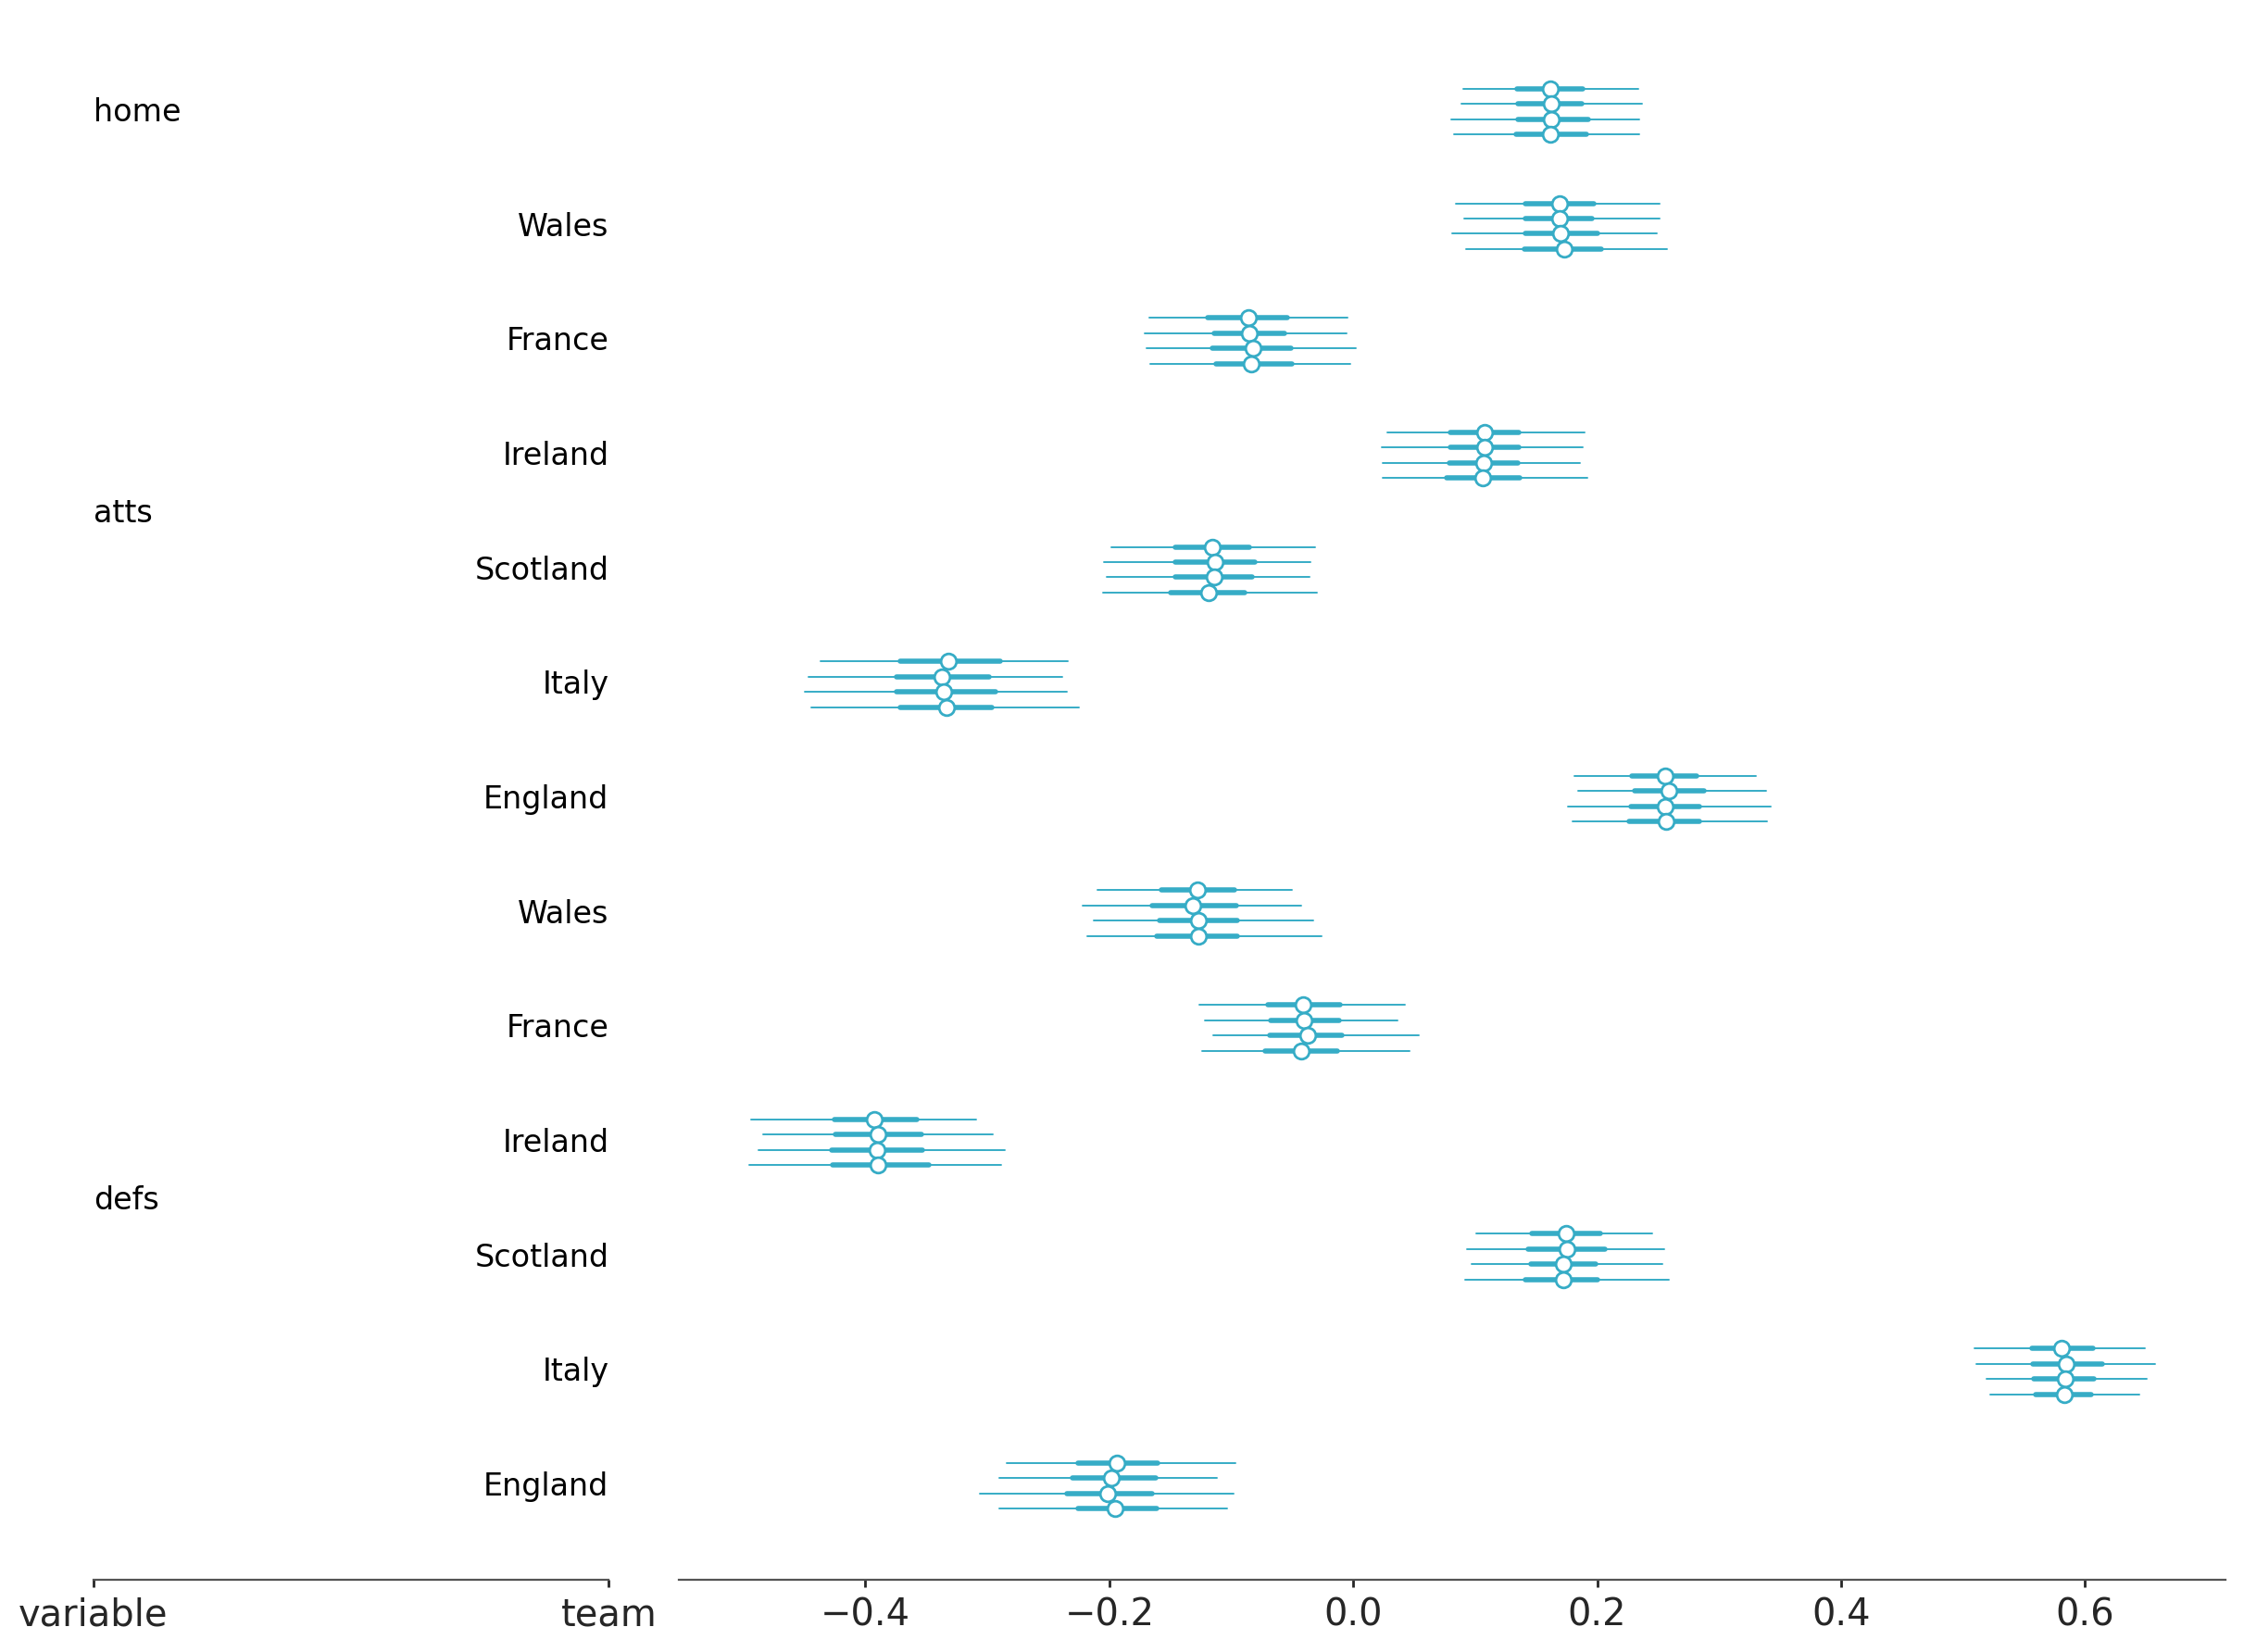

In [6]:
pc = plot_forest(idata, var_names=["home", "atts", "defs"])

In [7]:
pc.viz

<xarray.DataTree>
Group: /
│   Dimensions:    (column: 2)
│   Coordinates:
│     * column     (column) <U6 48B 'labels' 'forest'
│   Data variables:
│       figure     object 8B Figure(2400x1761.48)
│       plot       (column) object 16B Axes(0.0371183,0.0376897;0.231949x0.957579...
│       row_index  (column) int64 16B 0 0
│       col_index  (column) int64 16B 0 1
├── Group: /variable_label
│       Dimensions:  ()
│       Data variables:
│           home     object 8B Text(0, 11.8, 'home')
│           atts     object 8B Text(0, 8.3, 'atts')
│           defs     object 8B Text(0, 2.3000000000000007, 'defs')
│       Attributes:
│           ignore_aes:  {'y'}
├── Group: /team_label
│       Dimensions:  (team: 6)
│       Coordinates:
│         * team     (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home     object 8B Text(1, 11.8, '')
│           atts     (team) object 48B Text(1, 10.8, 'Wales') ... Text(1, 5.800000000...
│           defs     (team) object 48B Text(1, 4.800000000000001, 'Wales') ... Text(1...
│       Attributes:
│           ignore_aes:  {'y'}
├── Group: /twig
│       Dimensions:  (chain: 4, team: 6)
│       Coordinates:
│         * chain    (chain) int64 32B 0 1 2 3
│         * team     (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home     (chain) object 32B Line2D(_child0) ... Line2D(_child3)
│           atts     (chain, team) object 192B Line2D(_child4) ... Line2D(_child27)
│           defs     (chain, team) object 192B Line2D(_child28) ... Line2D(_child51)
├── Group: /trunk
│       Dimensions:  (chain: 4, team: 6)
│       Coordinates:
│         * chain    (chain) int64 32B 0 1 2 3
│         * team     (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home     (chain) object 32B Line2D(_child52) ... Line2D(_child55)
│           atts     (chain, team) object 192B Line2D(_child56) ... Line2D(_child79)
│           defs     (chain, team) object 192B Line2D(_child80) ... Line2D(_child103)
└── Group: /point_estimate
        Dimensions:  (chain: 4, team: 6)
        Coordinates:
          * chain    (chain) int64 32B 0 1 2 3
          * team     (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
        Data variables:
            home     (chain) object 32B <matplotlib.collections.PathCollection object...
            atts     (chain, team) object 192B <matplotlib.collections.PathCollection...
            defs     (chain, team) object 192B <matplotlib.collections.PathCollection...

If instead we inspect the `PlotCollection` returned by {func}`~arviz_plots.plot_forest` we'll see there are different visuals stored.
In this case, all variables are in the same {term}`plot` because they are differenced by their `y` coordinate. The `plot`, `row_index` and `col_index` variables are now global, as they are shared by all variables. Still, we continue to have different shapes for different visuals and variables within them.

### `aes`: mapping of aesthetic keys to values and storage all at once
The other main attribute of `PlotCollection` is {attr}`.aes <.PlotCollection.aes>`. It is also a {class}`~.DataTree` and it has a similar structure. Now the {term}`aesthetics` are the groups. The contents of these groups depends on the type of mapping defined:

* If the {term}`aesthetic mapping` includes the variables, the group will have variables matching the ones in the input data. Just like what we saw with `.viz`
* If the {term}`aesthetic mapping` encodes only dimension information the group will have only 1 or 2 variables. The variable `mapping` will always be present.
  It is the one that contains the mapping from dimension(s) to aesthetic values. The second variable is optional: `neutral_element`. It is only present
  when the mapping defined is not applicable to all the variables in the input data. When present it is always a scalar containing the _neutral element_.

Instead of storing plotted objects, however, it stores {term}`aesthetic mapping` as key-value pairs.
This allows us to check what properties are being used depending on the coordinate values they represent. For example, we can then access them for further manual plotting using the same mappings. Similarly, it is also possible to modify them before calling (more) plotting functions that would then use the updated mappings instead.

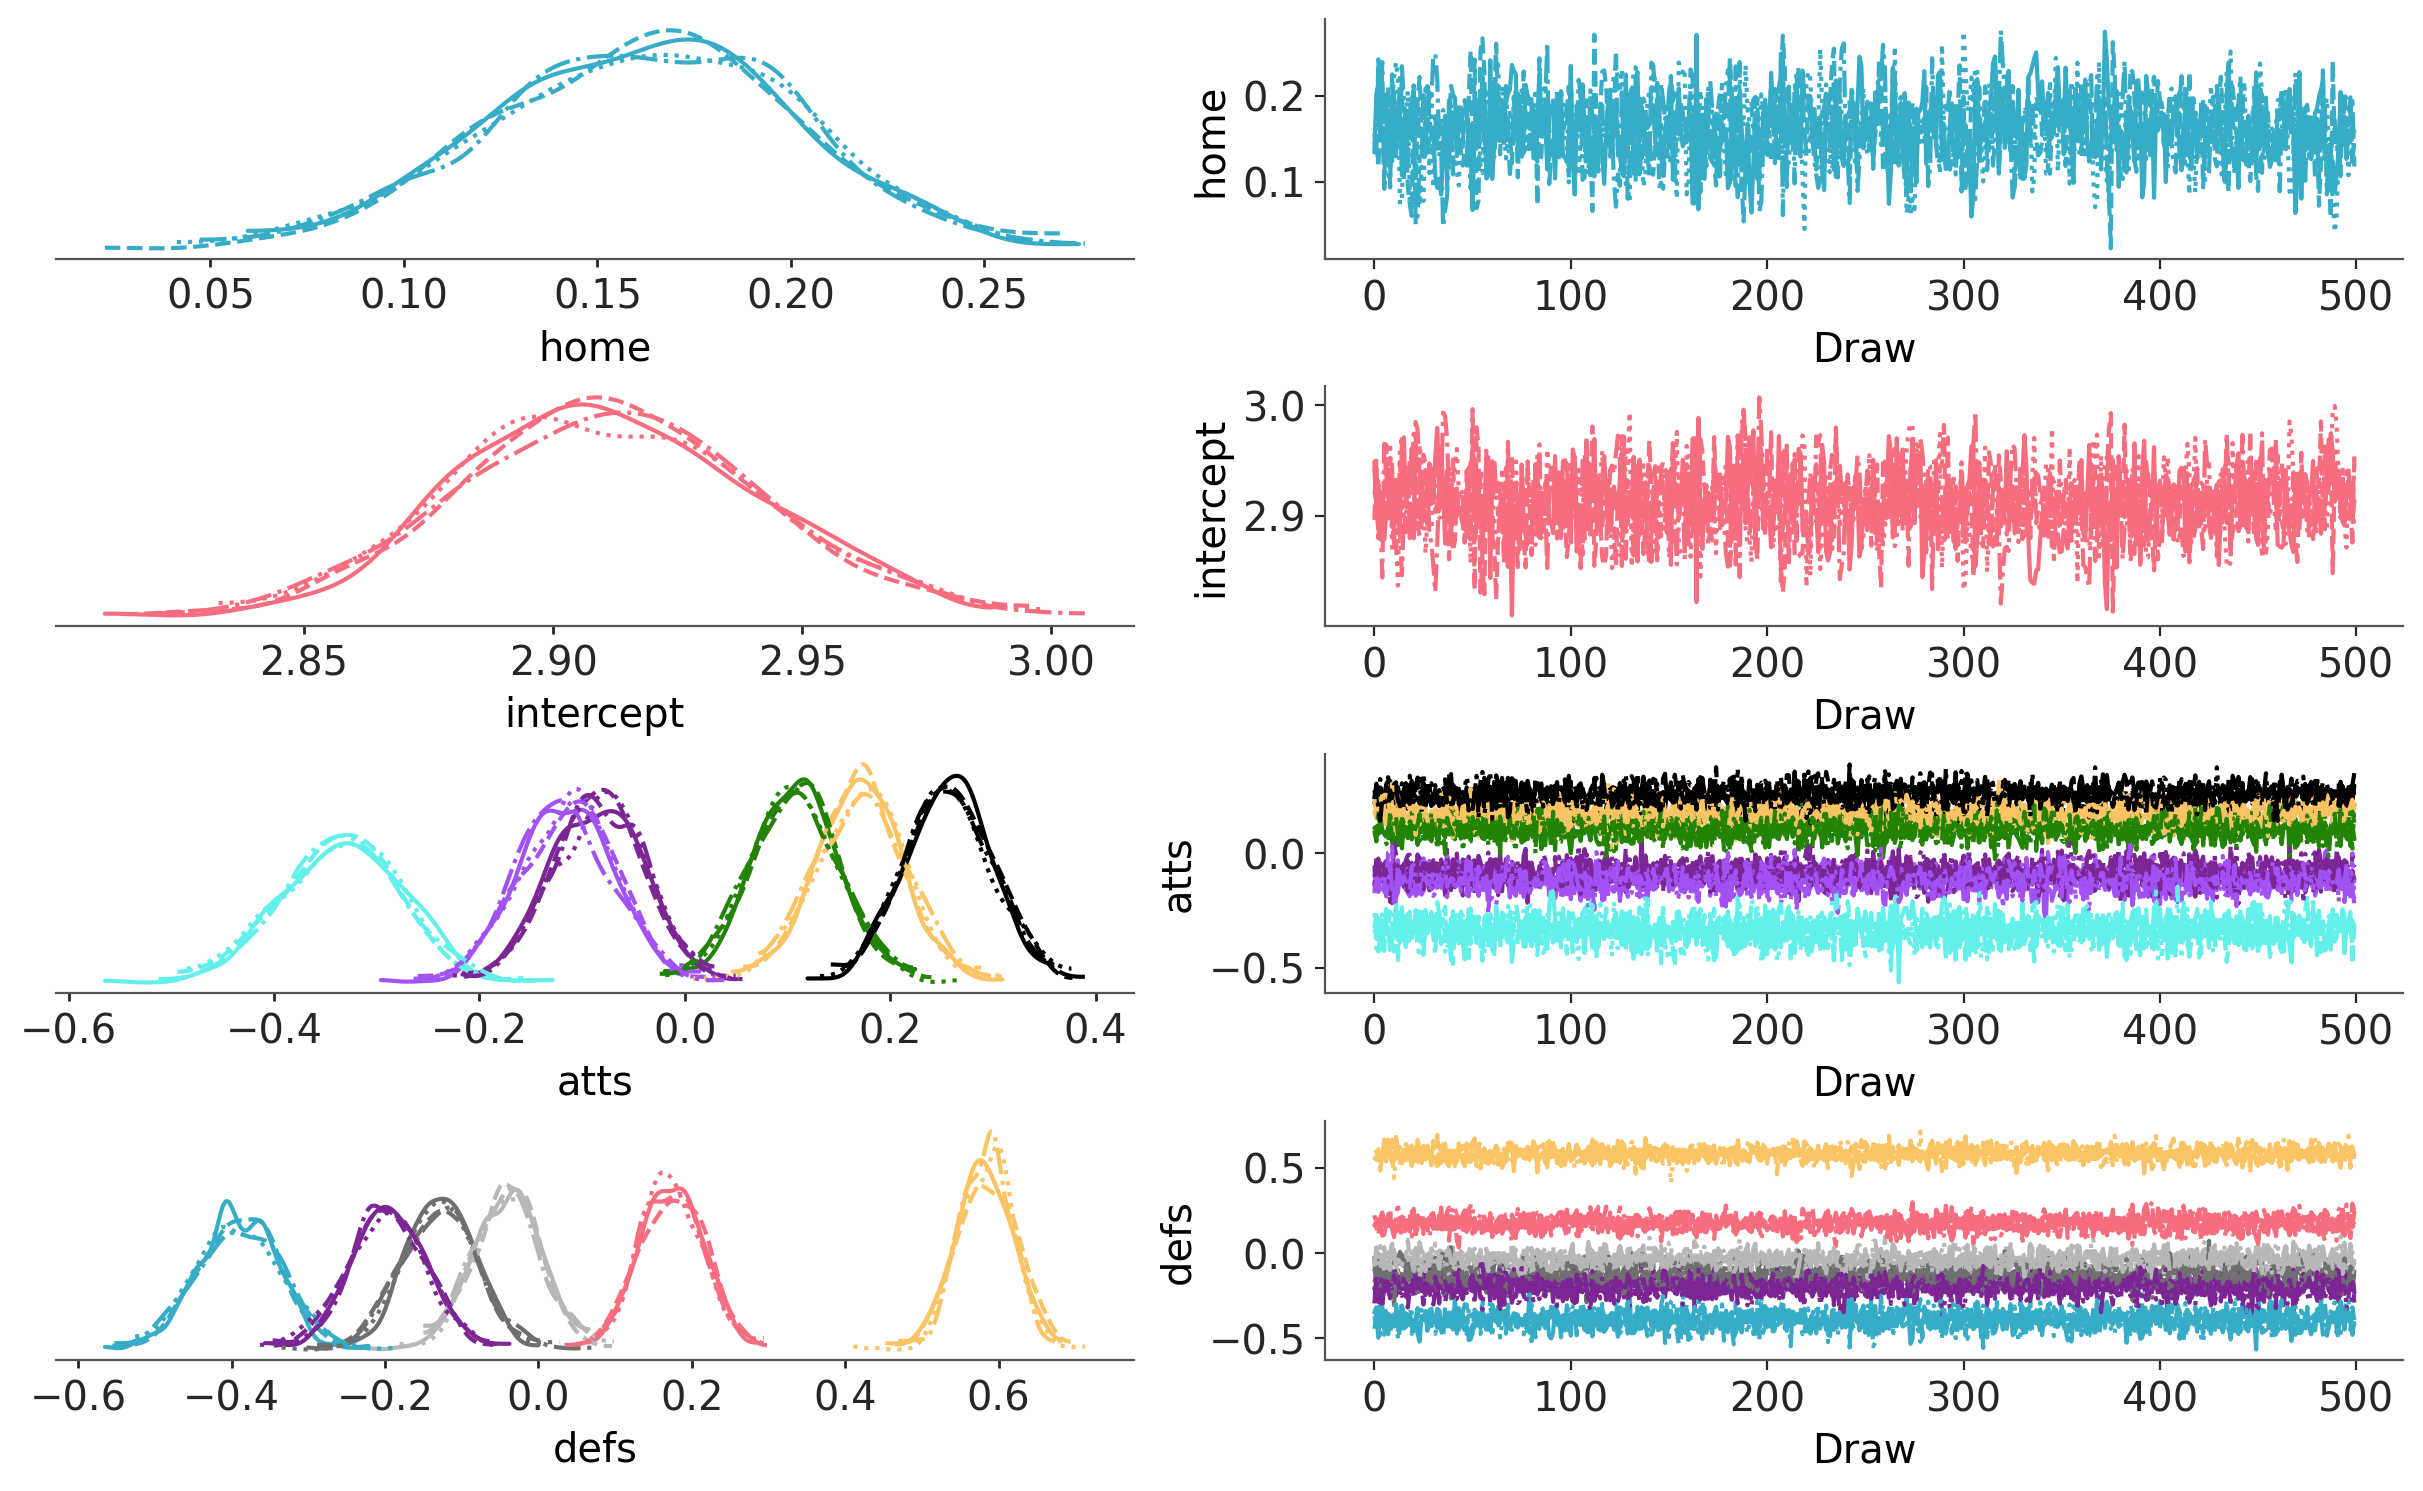

In [8]:
pc = plot_trace_dist(idata, var_names=["home", "intercept", "atts", "defs"])

Inspecting the `aes` attribute we can see that the linestyle depends on the coordinate value of the chain dimension,
and the color depends on both the data variable and the team dimension. All of this information clearly matches what we can see in the plot.

In [9]:
pc.aes

<xarray.DataTree>
Group: /
├── Group: /color
│       Dimensions:    (team: 6)
│       Coordinates:
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       <U7 28B '#36acc6'
│           intercept  <U7 28B '#f66d7f'
│           atts       (team) <U7 168B '#fac364' '#7c2695' ... '#63f0ea' '#000000'
│           defs       (team) <U7 168B '#6f6f6f' '#b7b7b7' ... '#fac364' '#7c2695'
├── Group: /overlay
│       Dimensions:    (chain: 4, team: 6)
│       Coordinates:
│         * chain      (chain) int64 32B 0 1 2 3
│         * team       (team) <U8 192B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
│       Data variables:
│           home       (chain) <U10 160B 'overlay_0' 'overlay_1' 'overlay_2' 'overlay_3'
│           intercept  (chain) <U10 160B 'overlay_4' 'overlay_5' 'overlay_6' 'overlay_7'
│           atts       (chain, team) <U10 960B 'overlay_8' 'overlay_9' ... 'overlay_31'
│           defs       (chain, team) <U10 960B 'overlay_32' ... 'overlay_55'
└── Group: /linestyle
        Dimensions:  (chain: 4)
        Coordinates:
          * chain    (chain) int64 32B 0 1 2 3
        Data variables:
            mapping  (chain) <U2 32B '-' '--' ':' '-.'

As the color depends on both the variable and the team, its group within `.aes` has variables matching those of the input data. On the other hand, as the linestyle only depends on the chain, it gets the `mapping` variable.

There is also an extra aesthetic called `overlay` whose value is ignored, but whose presence ensures we'll loop over the right dimensions and draw the expected lines.
This is helpful to plot multiple subsets all with the same visual properties, which is the default behaviour in {func}`~arviz_plots.plot_ppc` or to ensure the plot
behaves as expected even if we disable some of the default aesthetic mappings like we do in {ref}`this example <plots_intro/disable_aes>`.

## Customizing your `PlotCollection`

### Modify specific visual elements
If you pass keyword arguments to {meth}`~.PlotCollection.map`, those arguments will be used in all the calls to the plotting function `.map` does.
However, in some cases we might want more control. The next cell shows an example. We directly manipulate these properties to highlight only variables that correspond to the national team of Scotland.

:::{important}
As we have already mentioned, the structure of the .viz attribute is backend agnostic, but its contents are backend dependent.

Consequently, the steps to select a specific {term}`visual` given variable names and coordinates is always the same, but the result of that
is an object from the chosen plotting backend. Thus, modifying the visual element is backend dependent and we consider that adding helper functions for such tasks is out of the scope of the library.
:::

You can interact with the `.viz` attribute as you'd interact with any {class}`xarray.DataTree`. It is also possible to use the {meth}`~arviz_plots.PlotCollection.get_viz` helper method to simplify these calls a bit. See the differences below:

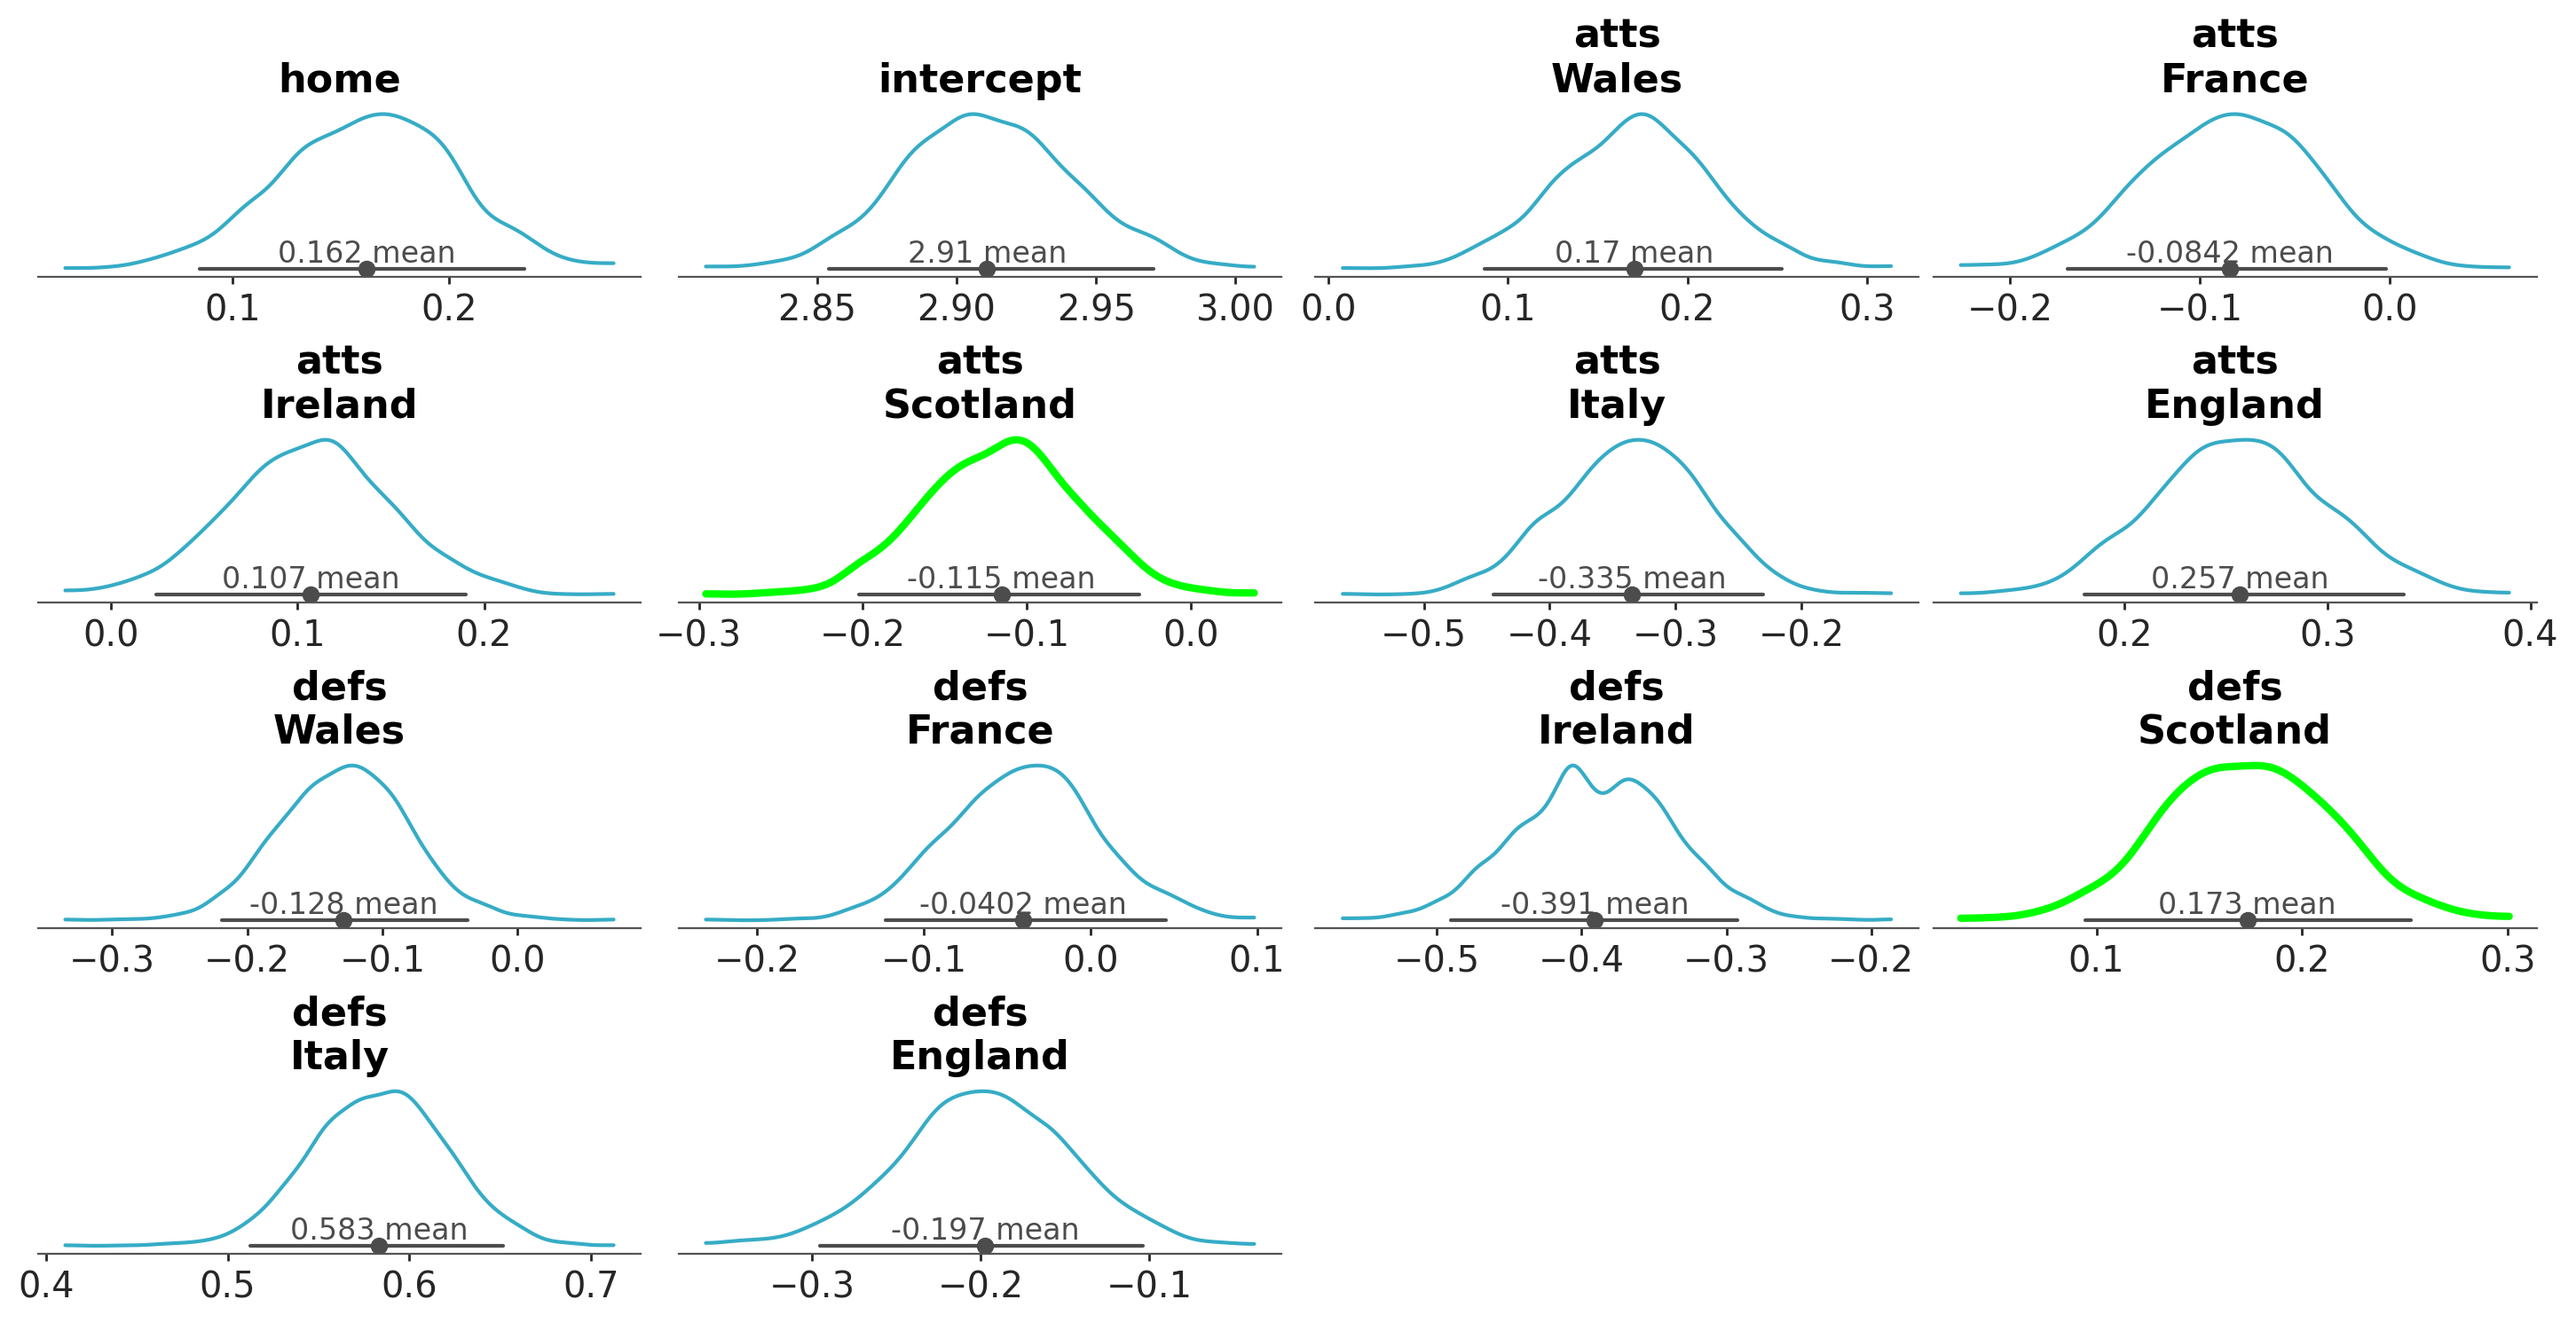

In [10]:
pc = plot_dist(idata, var_names=["home", "intercept", "atts", "defs"])
atts_scotland_kde = pc.viz["kde"]["atts"].sel(team="Scotland").item()
# atts_scotland_kde is now the Line2D object that
# corresponds to the kde line of the coordinate Scotland of variable atts
atts_scotland_kde.set(linewidth=3, color="lime")
pc.get_viz("kde", "defs", team="Scotland").set(linewidth=3, color="lime");

You are not limited to only manipulating {term}`visual element <visual>` properties. In the next cell, we show how to manipulate {term}`plot` properties; in this case to add a grid to only the intercept {term}`plot`.

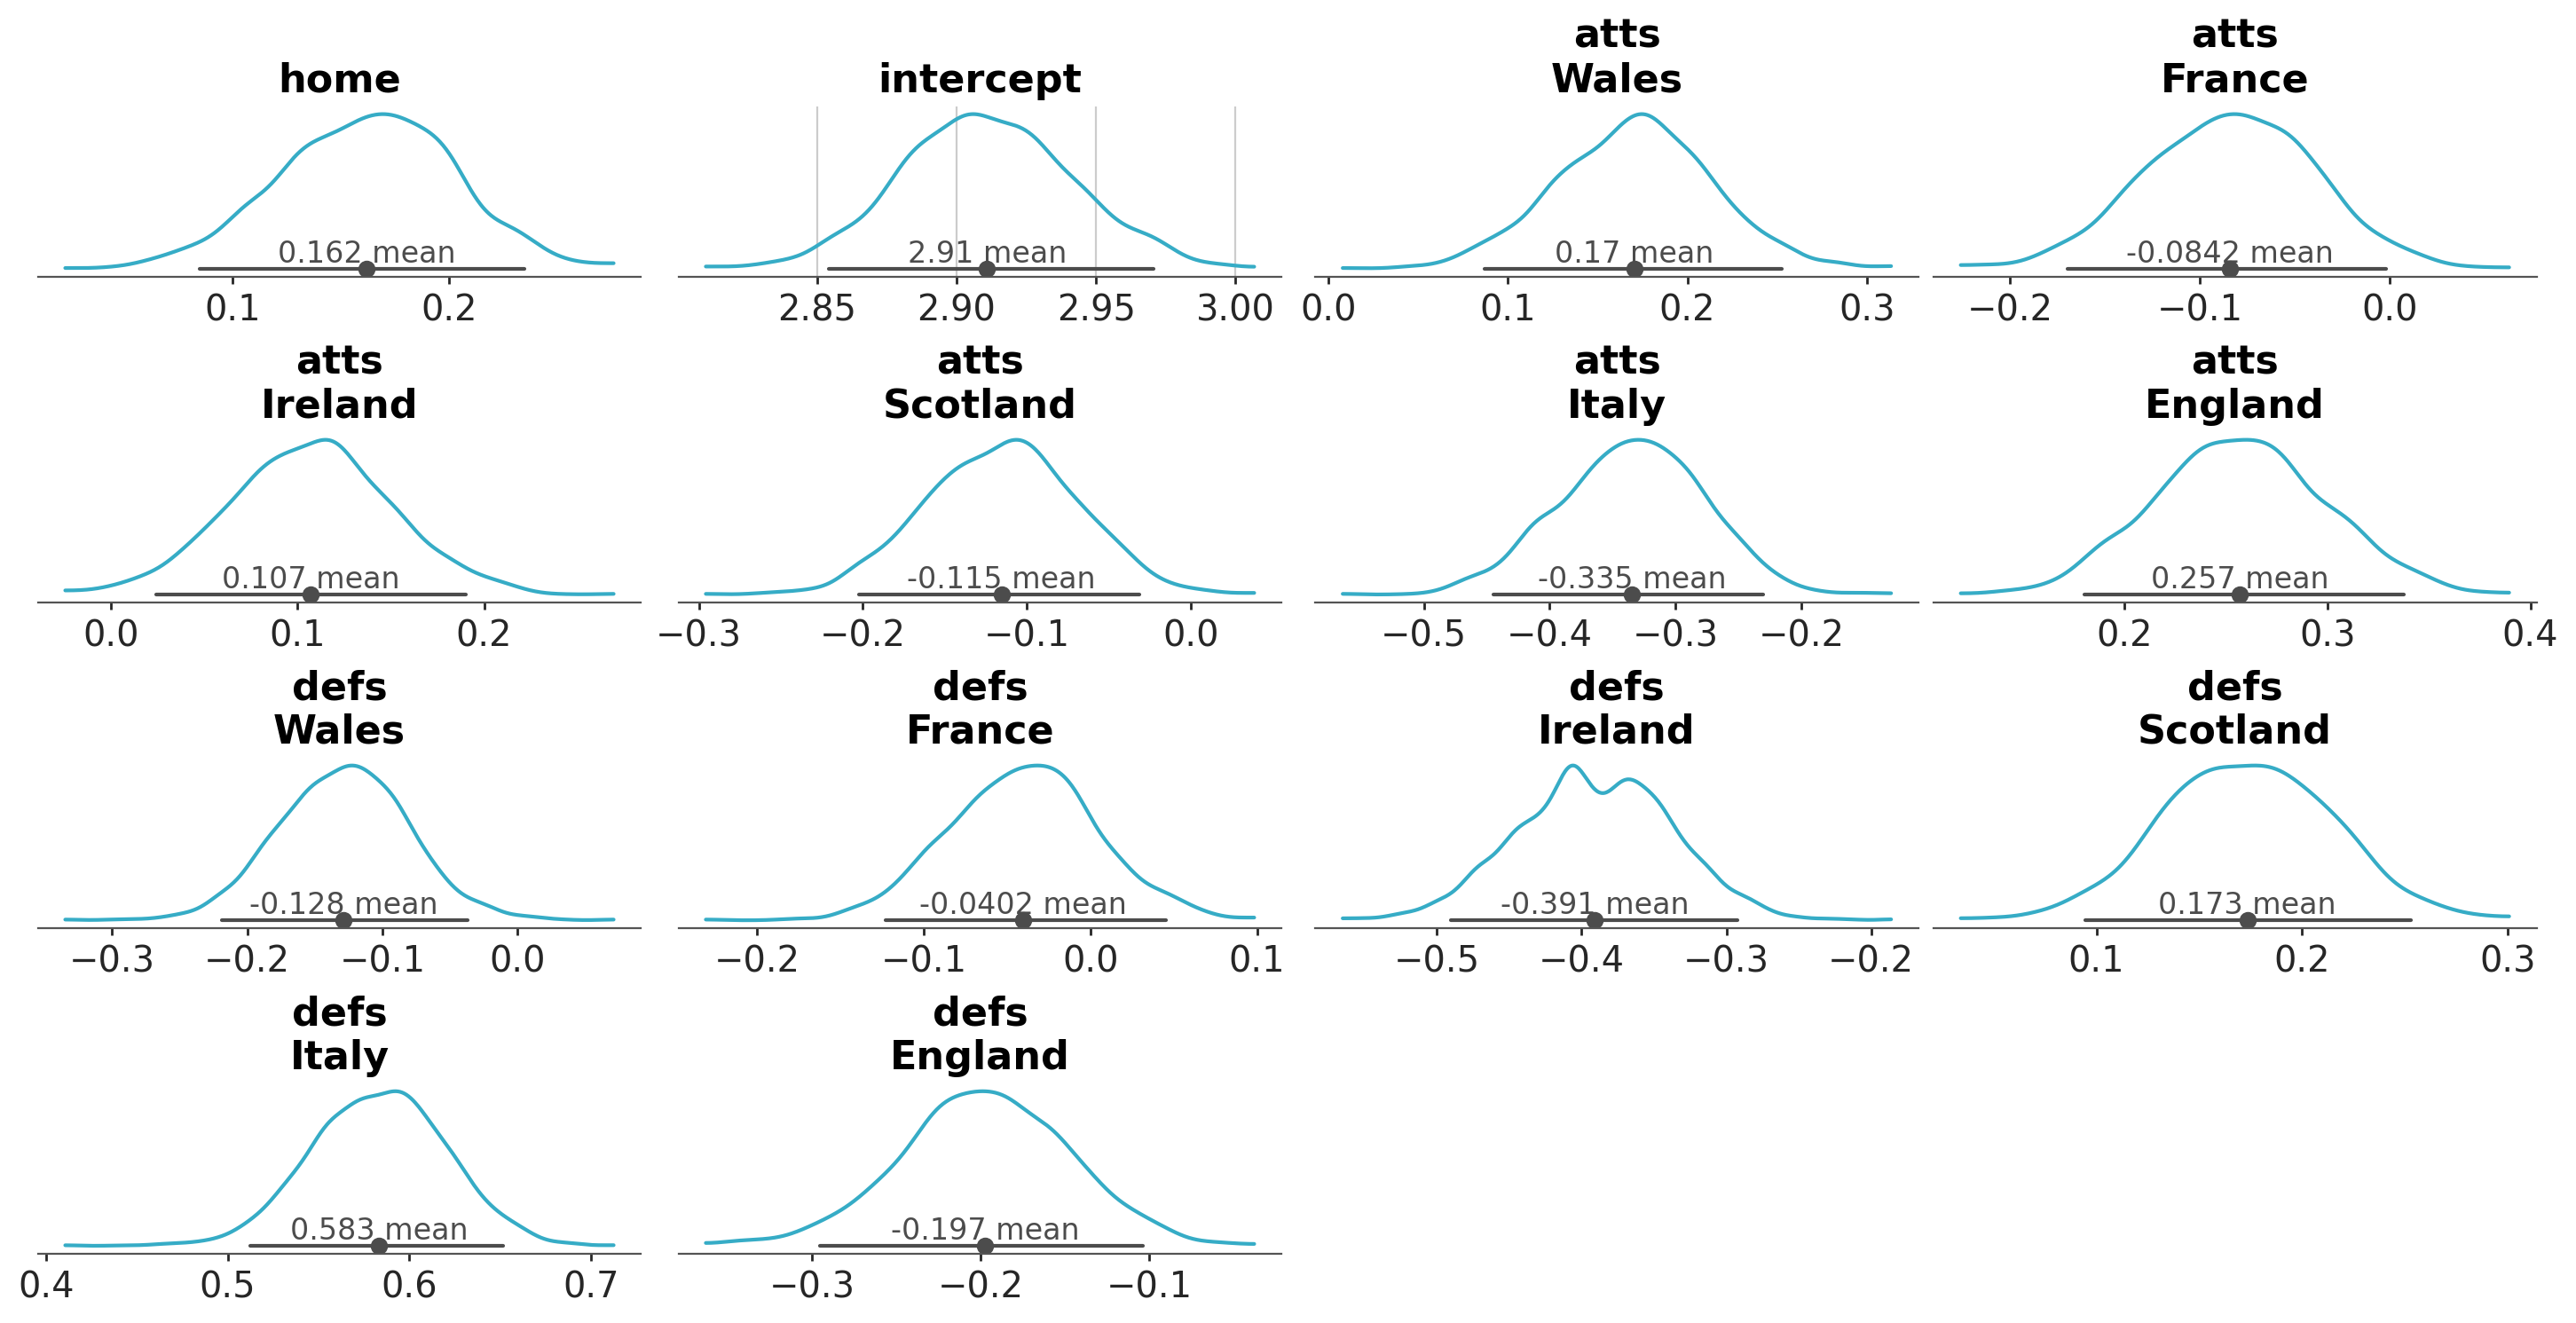

In [11]:
pc = plot_dist(idata, var_names=["home", "intercept", "atts", "defs"])
pc.get_viz("plot", "intercept").grid(True)

Let's also see an example of a similar task but using Bokeh as backend:

In [12]:
from bokeh.plotting import output_notebook
output_notebook()

Loading BokehJS ...

In [13]:
pc = plot_dist(
    idata,
    var_names=["home", "atts", "defs"],
    backend="bokeh",
    # make plot smaller
    figure_kwargs={"figsize": (1300, 600), "figsize_units": "dots"},
)
pe_glyph = pc.get_viz("point_estimate", "atts", team="Italy").glyph
pe_glyph

Scatter(id='p3833', ...)

We can inspect and modify any of the stored elements by their labels. We have saved the Bokeh object that corresponds to the point estimate dot in the `atts[team=Italy]` plot.
We can now change some of its properties before rendering the figure:

In [14]:
pe_glyph.fill_color = "red"
pe_glyph.size = 20
pc.show()

In some cases, it is more convenient to select elements based on their positions in the plot grid, rather than by variable names or coordinates. The `row_index` and `col_index` groups are provided for this purpose.

:::{note} Selection with row and column is a bit more convoluted that it might need to be, but this also serves to illustrate an important issue.
Some operations on the DataTree/Dataset/DataArray objects will trigger copies, which don't play well with the majority of plotting backend objects.

Here for example, attempting to use `.where(condition, drop=True)` which would make things more direct will trigger a copy and because of that the plotting backend will raise an error.
We are forced to convert the `.where` operation to an indexing one.
:::

In [15]:
pc = plot_dist(
    idata,
    var_names=["home", "atts", "defs"],
    backend="bokeh",
    # make plot smaller
    figure_kwargs={"figsize": (1300, 600), "figsize_units": "dots"},
)

import numpy as np
condition = (pc.get_viz("row_index", "defs") == 2) & (pc.get_viz("col_index", "defs") == 1)
cond_sel = {"team" : condition.coords["team"][condition]}
kde_glyph = pc.get_viz("kde", "defs", cond_sel).glyph
kde_glyph.line_color = "lime"
kde_glyph.line_width = 4
pc.show()

### Add new visual elements to a `PlotCollection`
Instead of modifying existing visual elements, we might instead want to add more elements to the plots.
If we want to add something to a specific plot, the procedure is basically the same as above with the only difference
of calling a plotting function instead of modifying properties of the existing elements.

For example, let's plot a vertical reference line to the `defs` of the France national team:

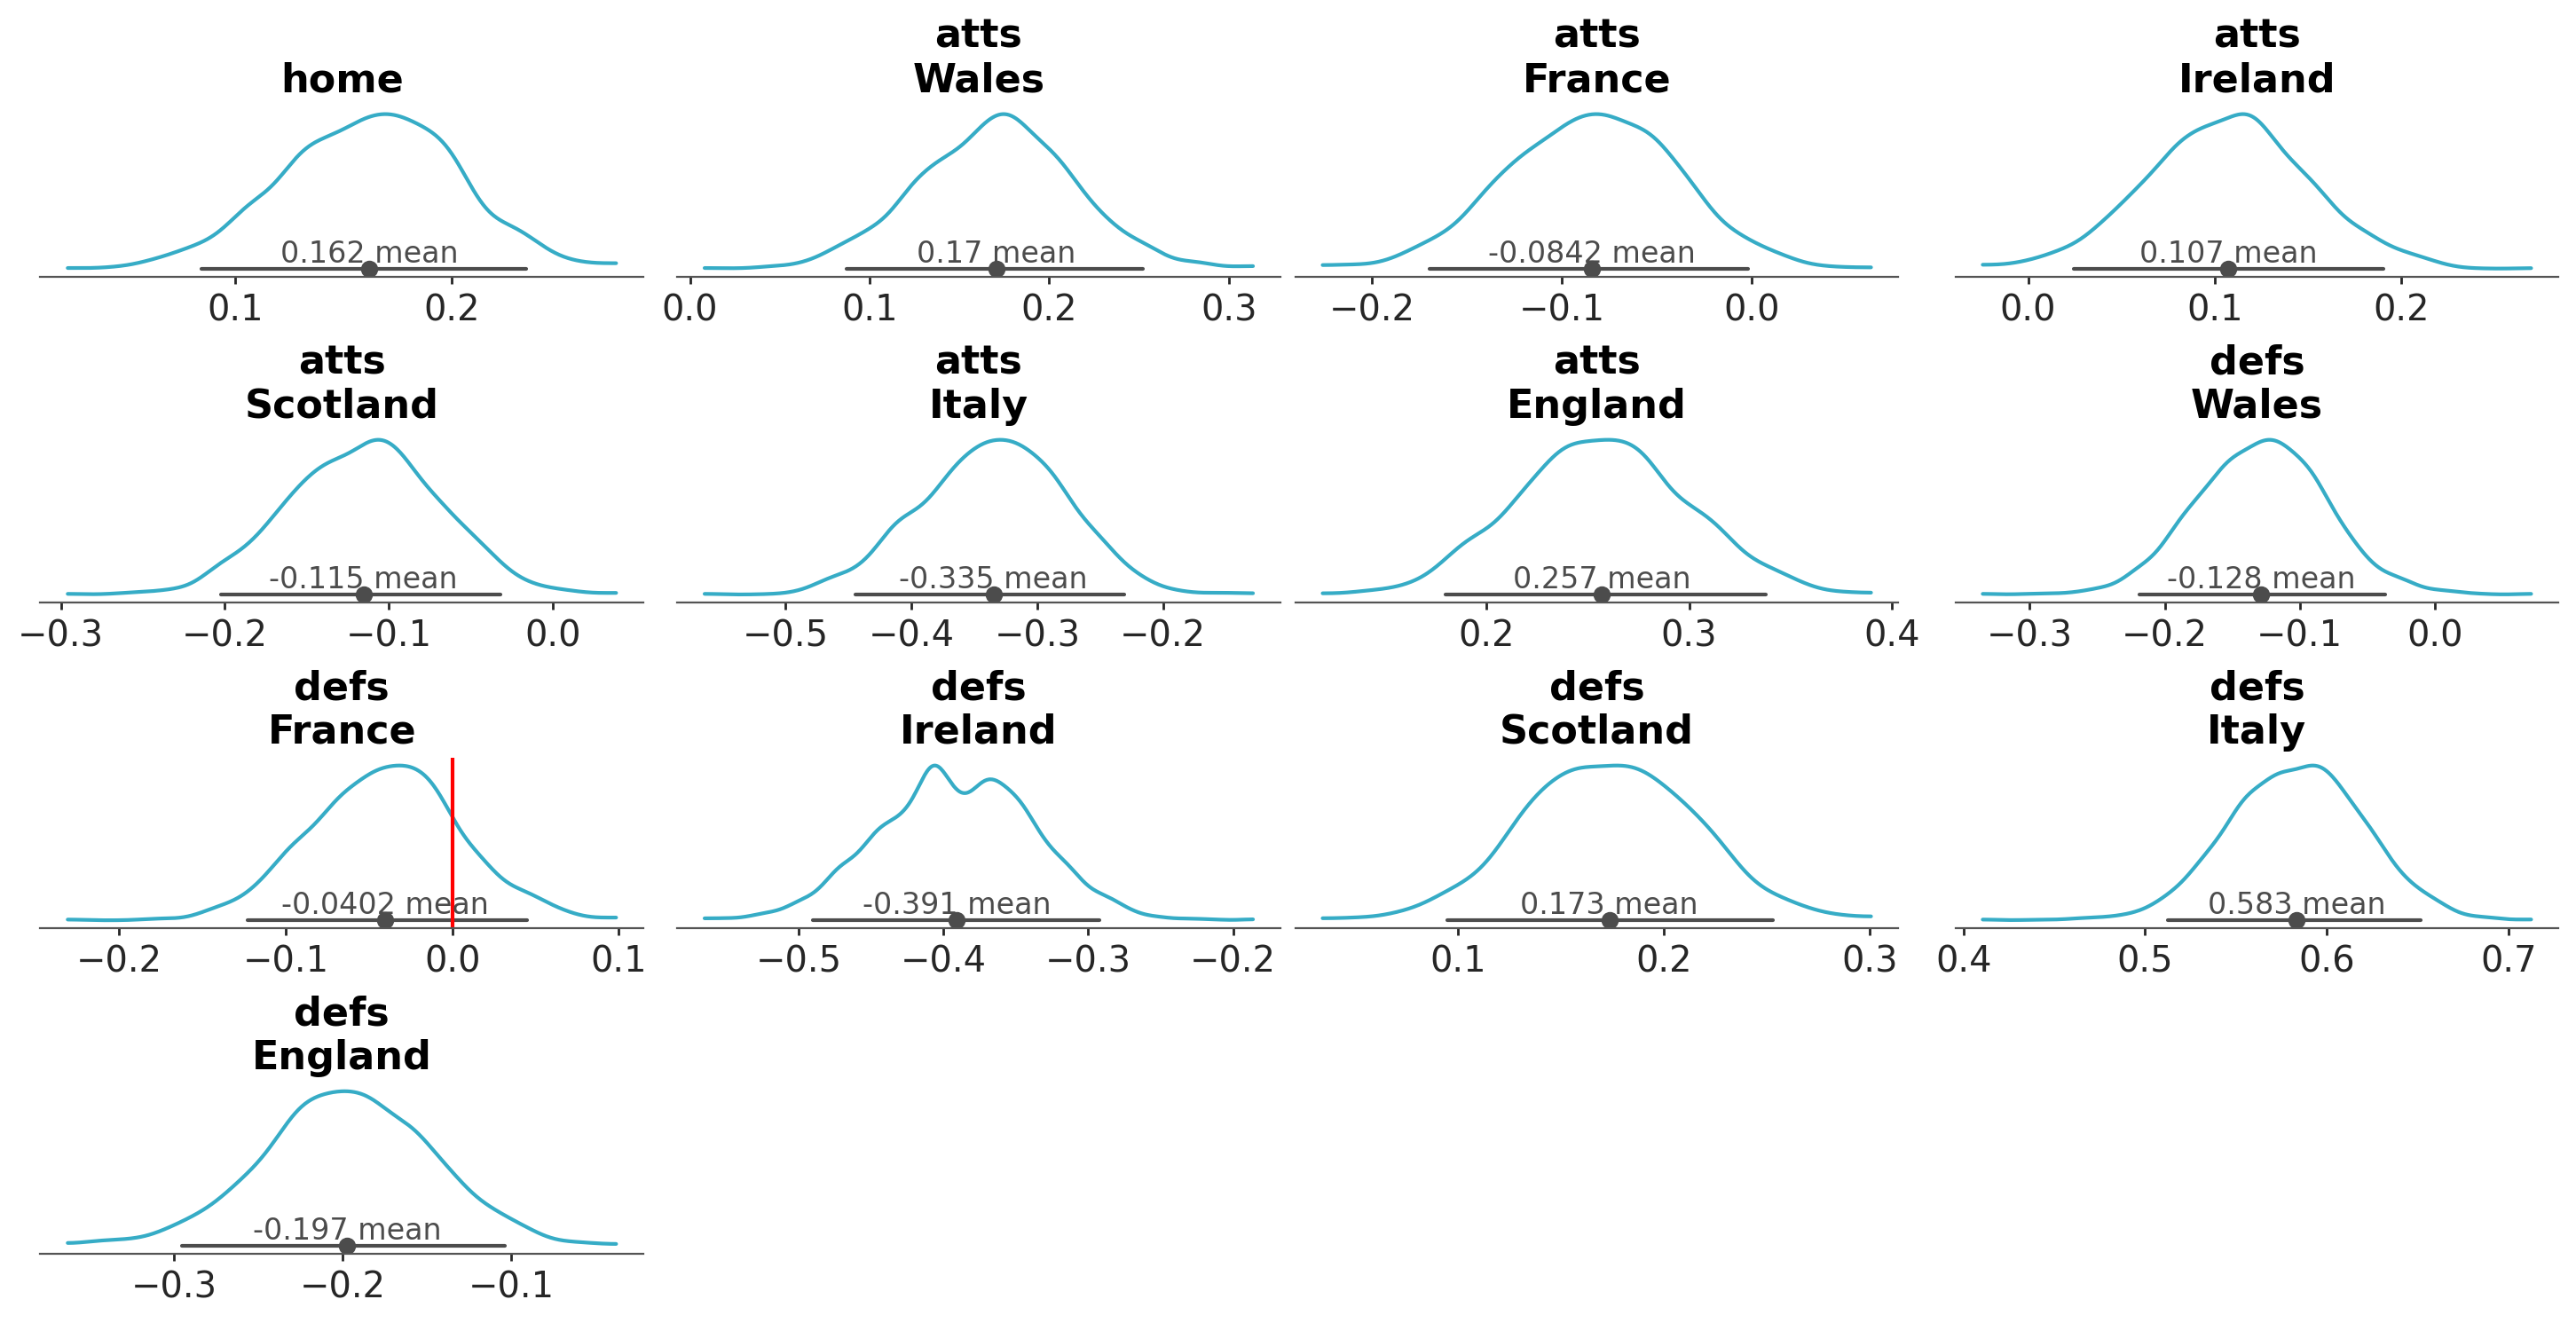

In [16]:
pc = plot_dist(idata, var_names=["home", "atts", "defs"])
ax = pc.get_viz("plot", "defs", team="France")
ax.axvline(0, color="red");

If we instead want to apply it to all plotting functions, we can use {meth}`~.PlotCollection.map`:

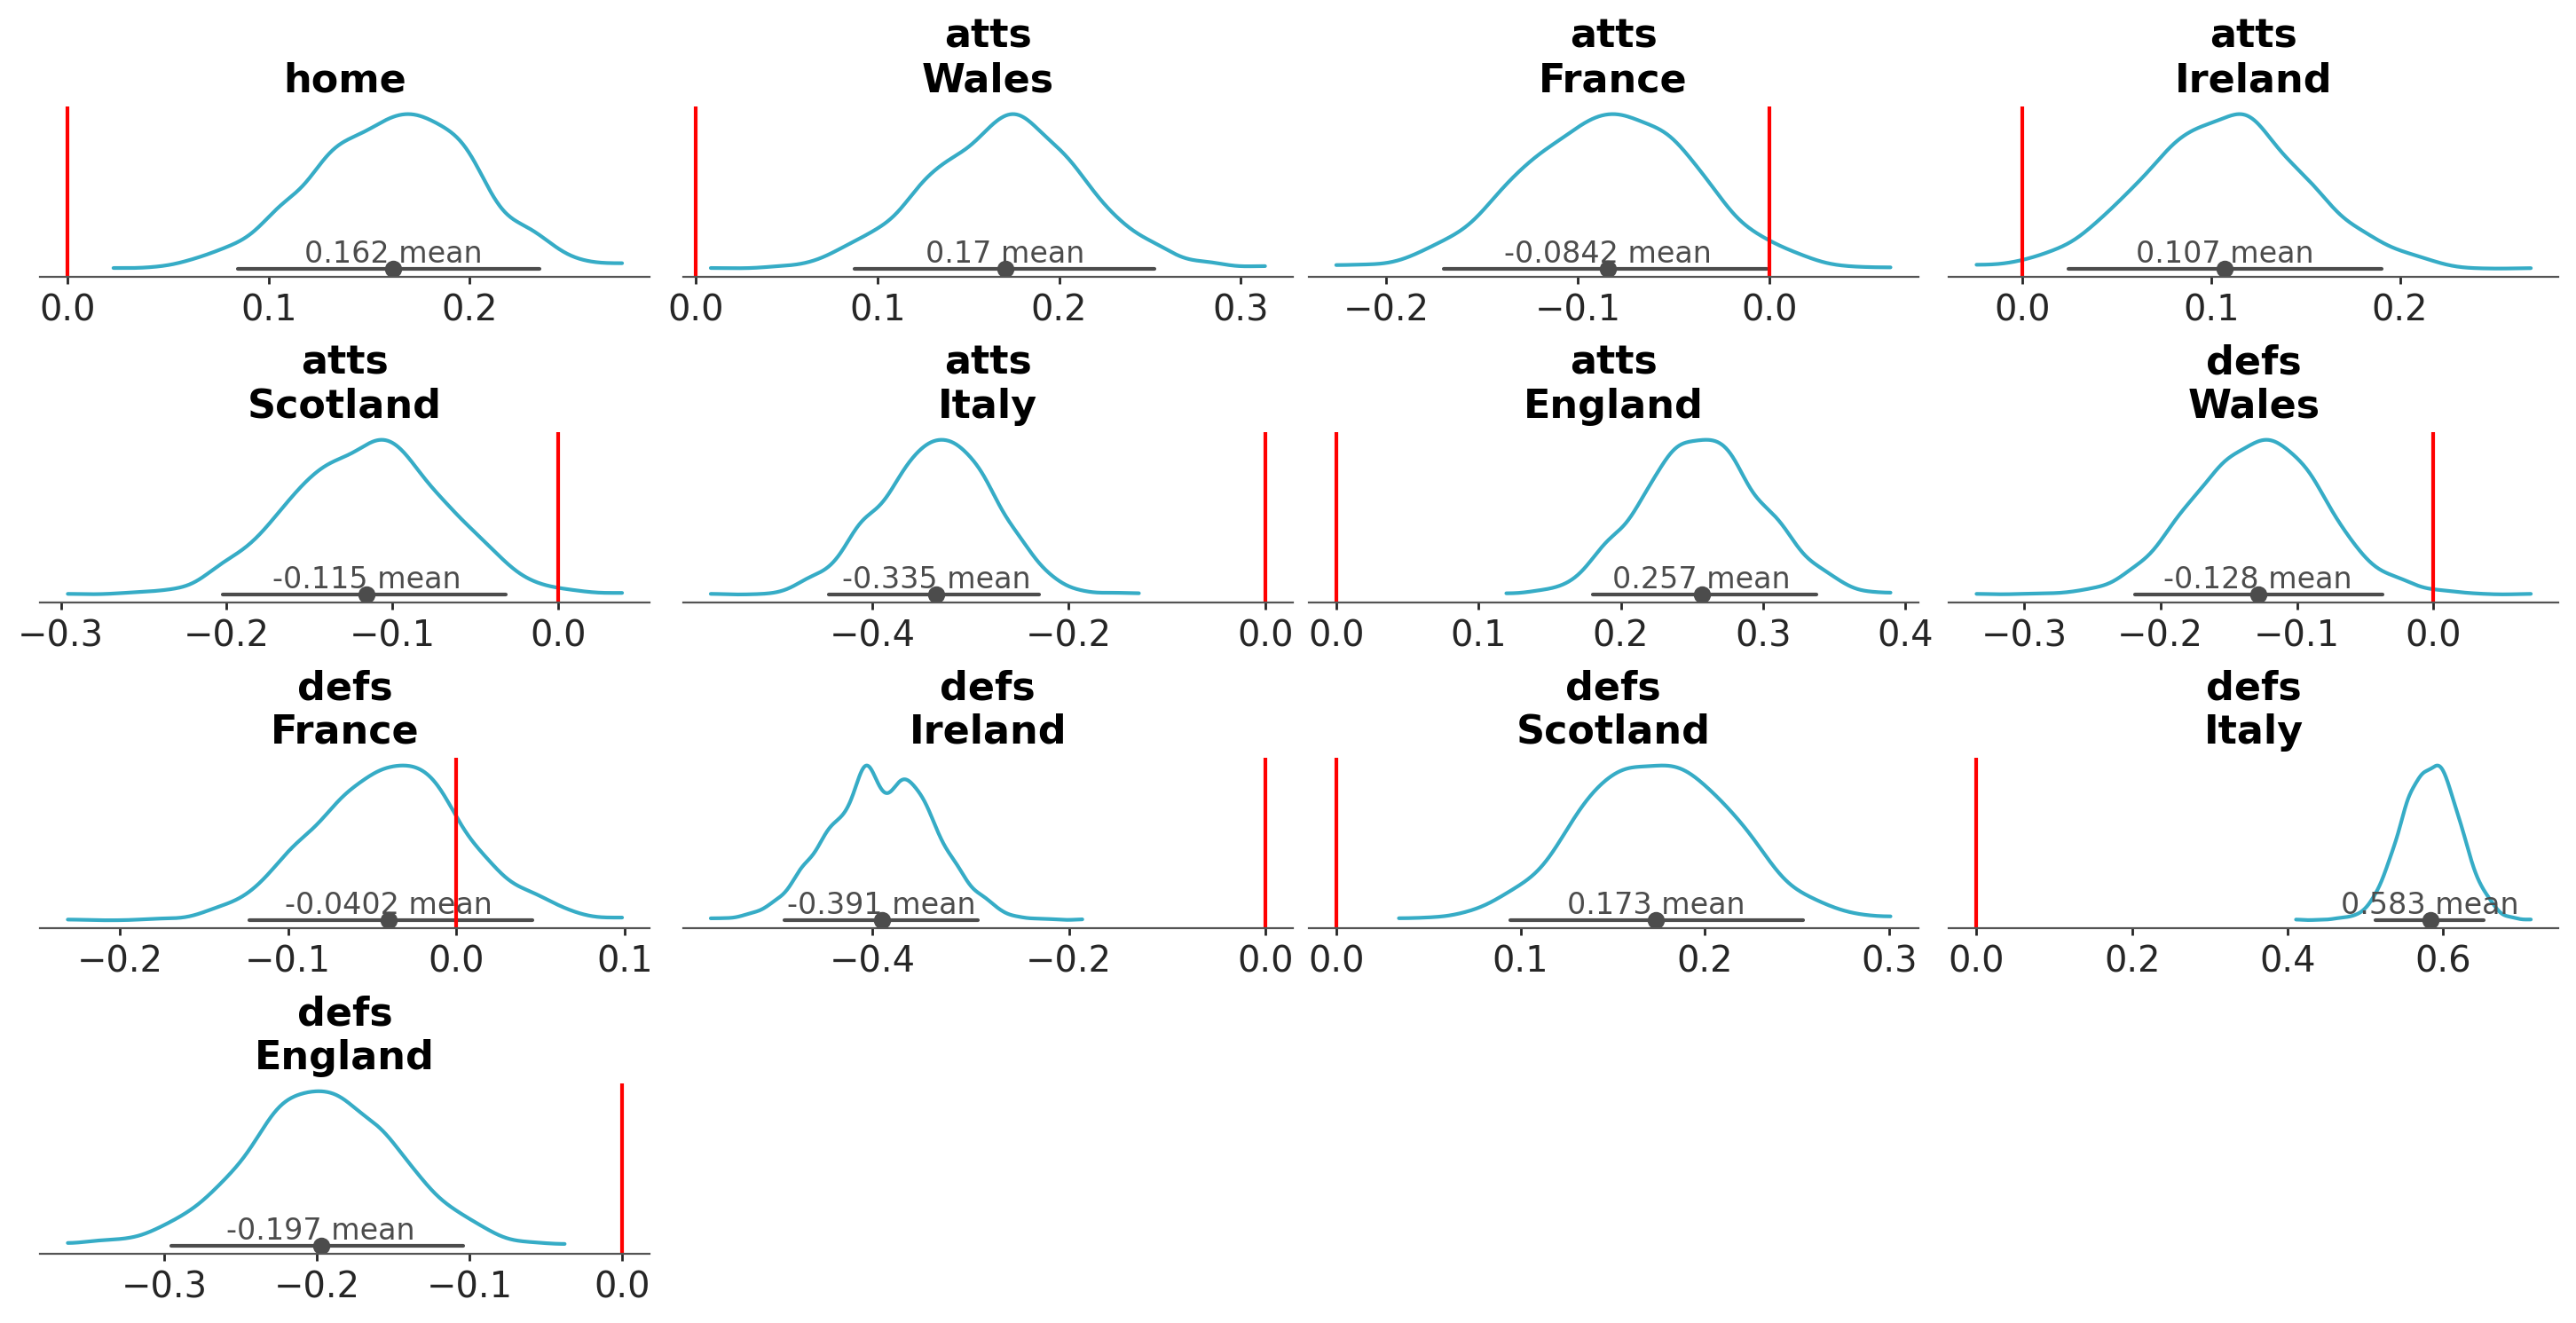

In [17]:
# to be able to use map, callables must accept 2 positional arguments
# a DataArray and the plotting target
def axvline(da, target, **kwargs):
    return target.axvline(0, **kwargs)

pc = plot_dist(idata, var_names=["home", "atts", "defs"])
pc.map(axvline, color="red")

:::{seealso}
The `map` method is one of the main building blocks provided by `PlotCollection`. The {ref}`compose_own_plot` page covers the use of `map` more extensively.
:::

### Legends
`PlotCollection` also provides a method to automatically generate legends for the plots.

:::{warning} The API of the {meth}`~.PlotCollection.add_legend` method is still quite experimental.
:::

For properties that are shared for all variables, generating the legend is relatively straightforward. Mappings are unique, and we have sensible defaults available: coordinate values as legend entries and the dimension name as the legend title.

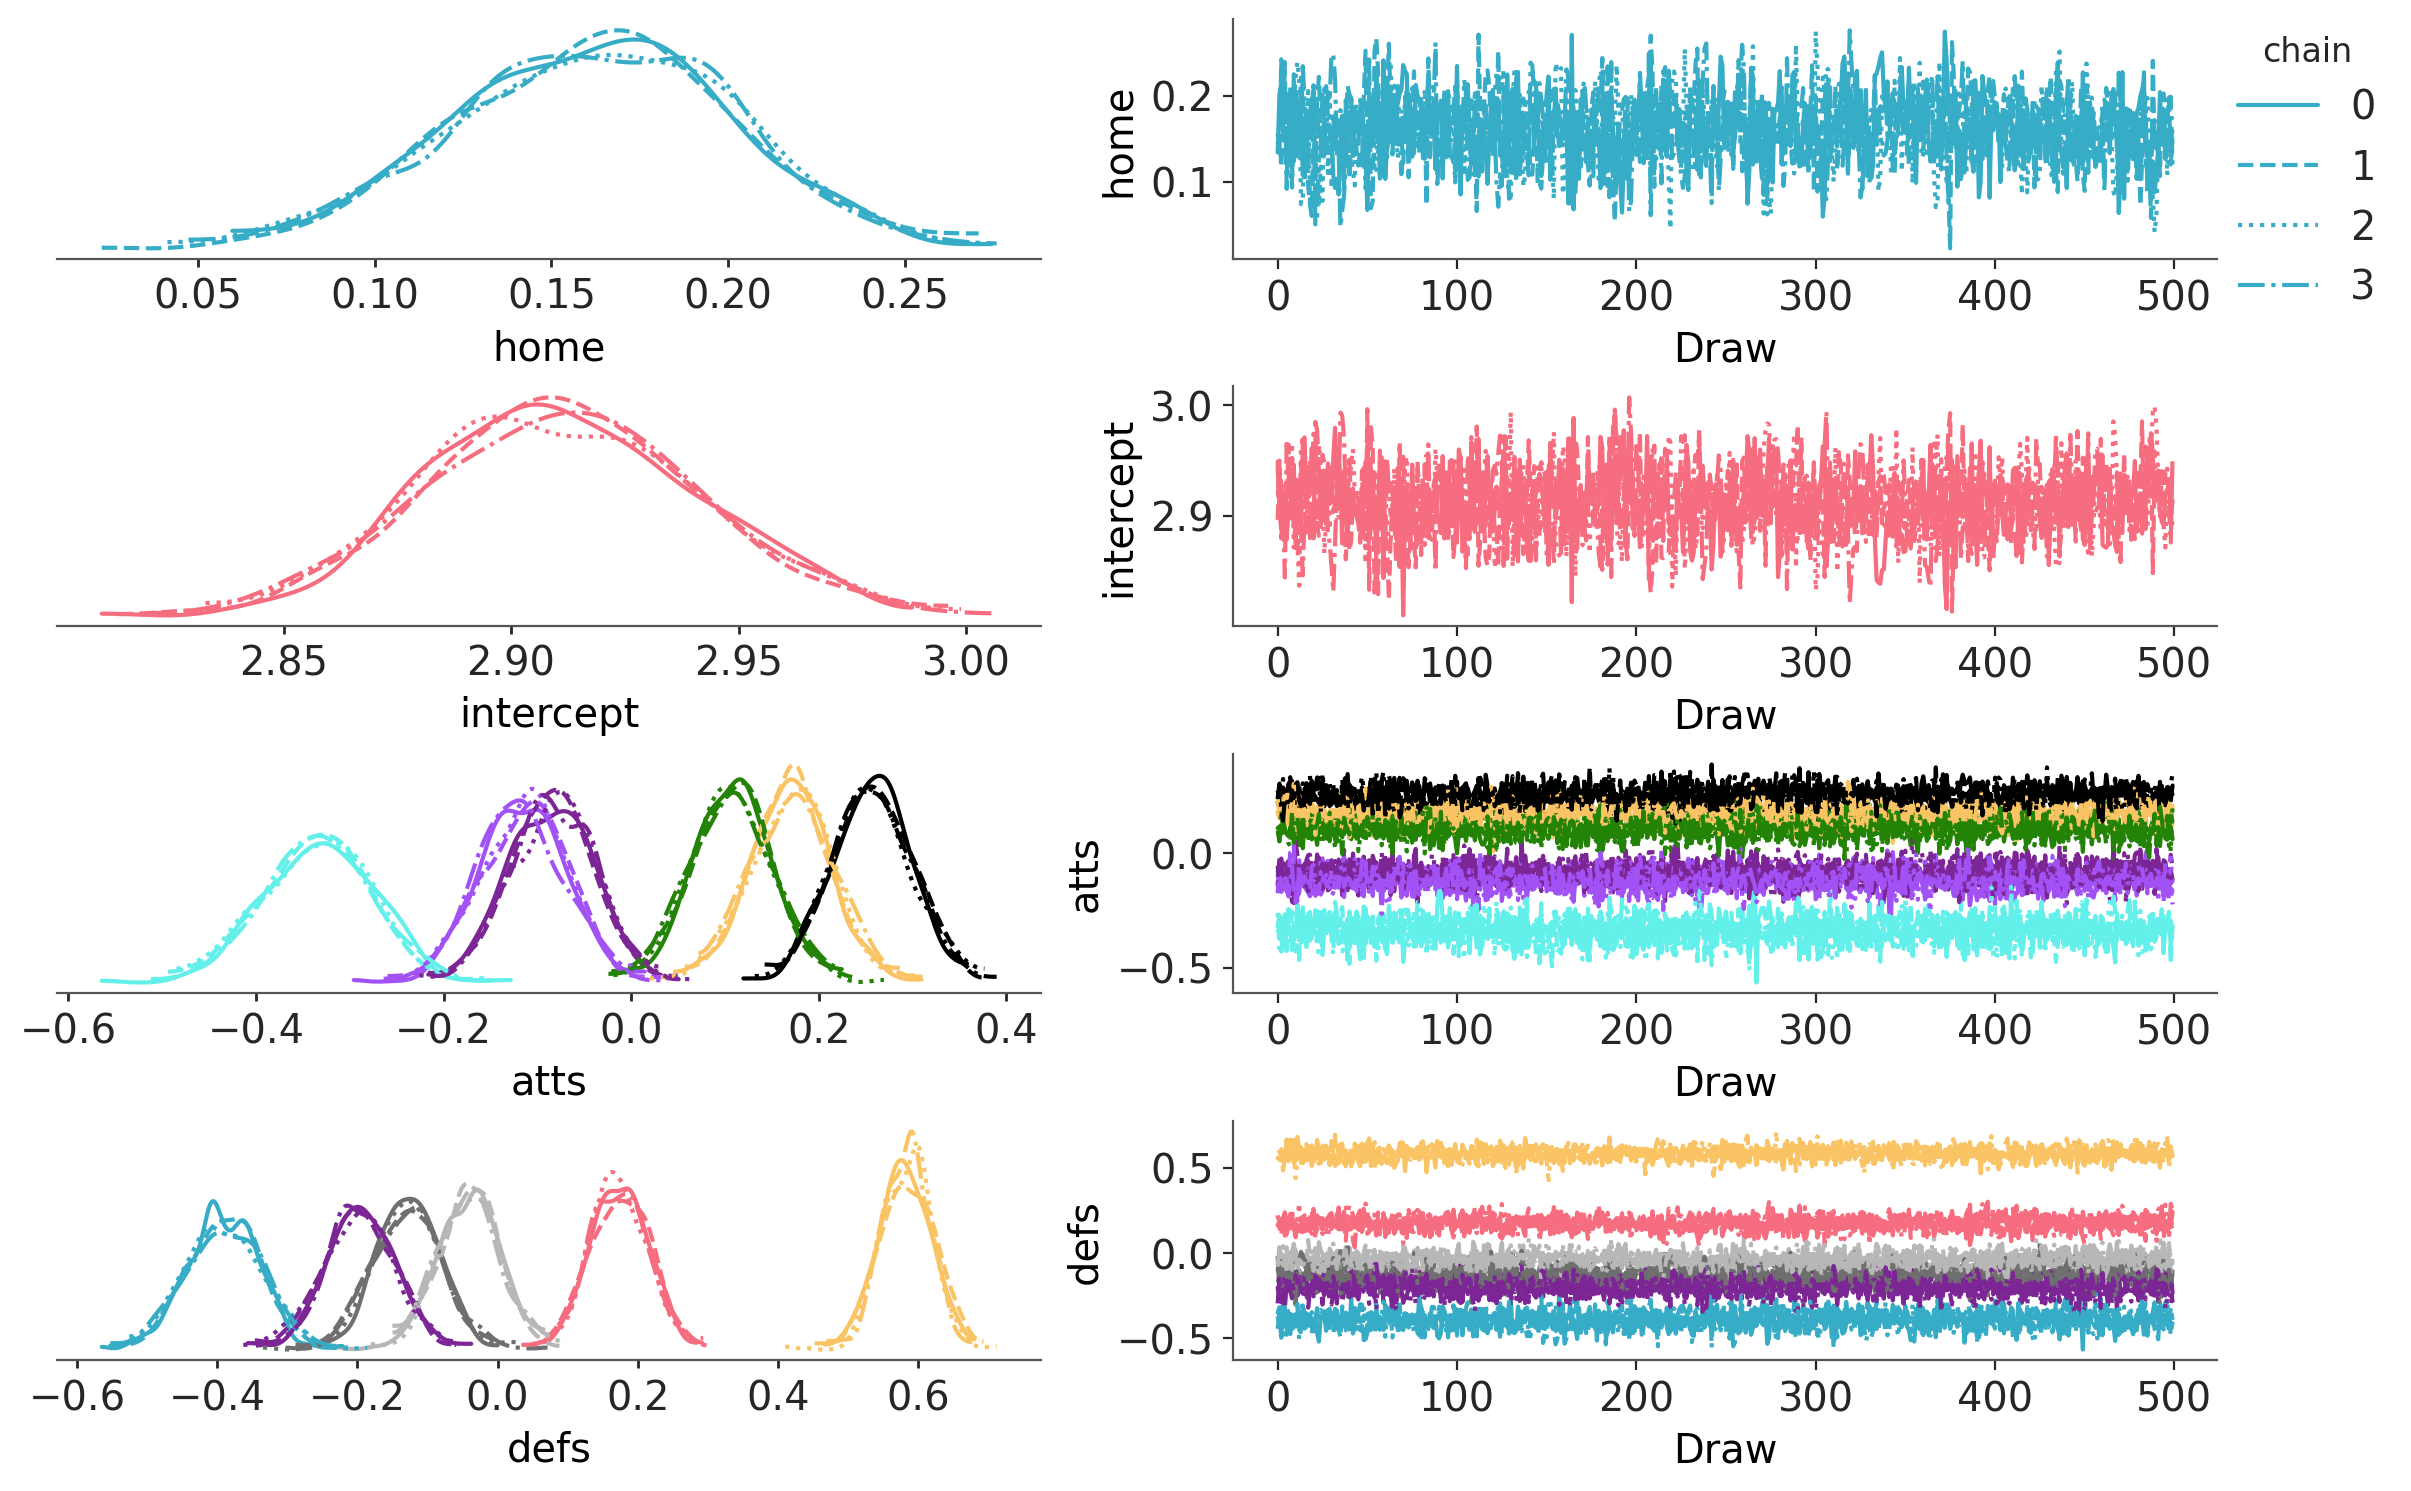

In [18]:
pc = plot_trace_dist(idata, var_names=["home", "intercept", "atts", "defs"])
pc.add_legend("chain");

It is also possible to have properties that depend on both the data variable and dimensions. In general, aesthetic mappings can be complex, with dependencies on arbitrary combinations of variables and dimensions. There can even be combinations of aesthetics which map to combinations of variables and dimensions!

Moreover, we sometimes use aesthetic mappings as a way to distinguish different visual elements or groups of visual elements. In these cases we might not need a legend, or we might even prefer to omit it.

The example we have just seen, which we'll also repeat below, has a bit of everything. On one hand, we might need two legends: one for the color encoding into variable+team and another for the linestyle encoding into the chain. On the other hand, in this particular example (and in general when using `plot_trace_dist` as a diagnostic) we don't really care about the specific encodings. The different colors for different variable+team combinations allow us to check if same color lines overlap, meaning all chains have converged to the same distribution.
Knowing if the yellow line is `atts` for the Italy team or `defs` for the Scotland team is irrelevant to our goal of diagnosing convergence. So is knowing if the dashed line represents the chain 0 or the 3.

Therefore, it would be OK to skip both legends altogether. Using `PlotCollection` you can choose in couple lines which situation best adapts to your particular use-case: no legend, legend for a subset of the mappings or one legend for each aesthetic mapping.

To add a legend on a mapping over multiple dimensions we use a sequence of dimensions (with `__variable__` also being valid) as first argument. Here we also add matplotlib specific kwargs to get the legend to look better:

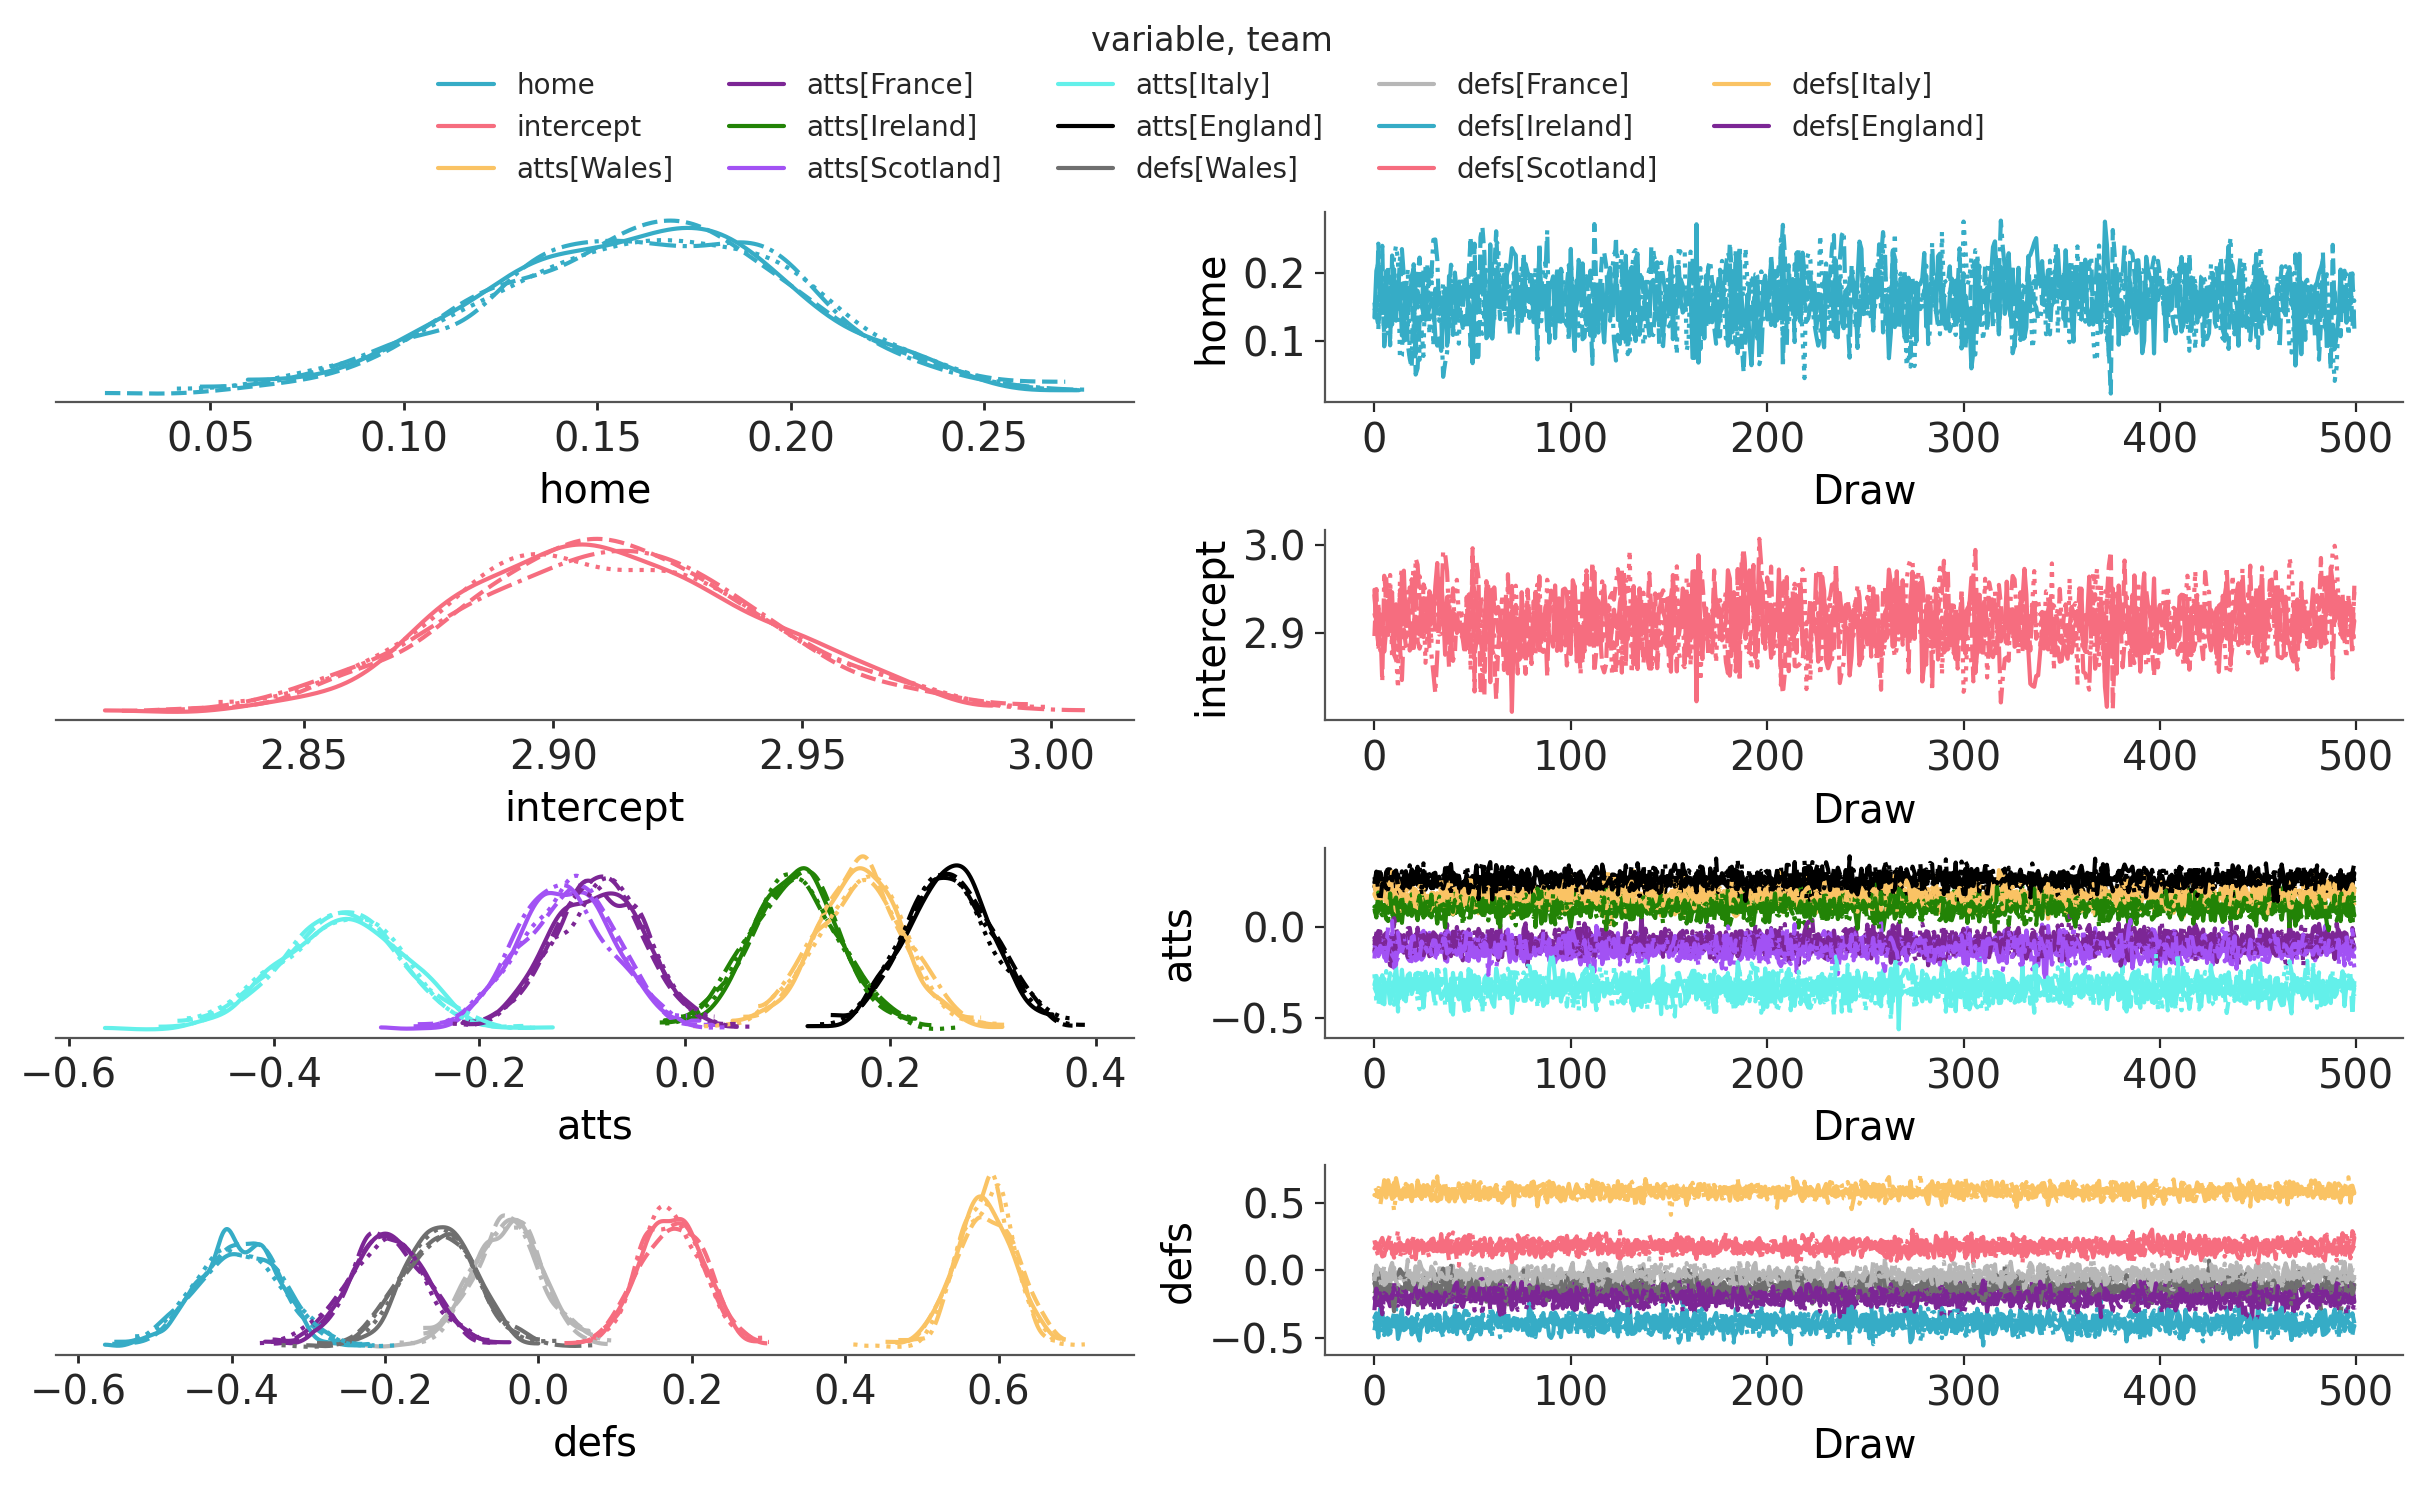

In [19]:
pc = plot_trace_dist(
    idata,
    var_names=["home", "intercept", "atts", "defs"],
)
pc.add_legend(("__variable__", "team"), loc="outside upper center", fontsize=10, ncols=5);

In this example each combination of variable and dimension is encoded in a single aesthetic, but that is not necessarily true. The {ref}`plots_intro/advanced` section has some examples with multiple aesthetics mapped to the same dimension combination. In such cases, the legend requested for such dimension shows the multiple aesthetics.

:::{seealso}
* coming soon: In depth explanation of how faceting and aesthetics are handled
* coming soon: backend specific cookbooks
* {ref}`compose_own_plot` shows how to create and fill visualizations from scratch using `PlotCollection`. There is nothing wrong with modifying an existing figure through its `PlotCollection`. In fact, the design of arviz-plots encourages it and goes to great lengths to make sure it is possible. That being said, if you find yourself constantly needing to modify the generated `PlotCollection`s it might be need to generate your own specific plotting functions.
:::